# **STINTSY Project**

***GROUP 5 - STINTSY S17***


Member Name - Github Username
* Apetreor, Marcus - `@Marcus-Apetreor`
* Clavano, Angelica (Jack) - `@clavzno`
* Homssi, Yazan - `@Shinoruba`

---

# **Section 1: Introduction to the Problem/task and Dataset**

For this project, we were assigned two real-world datasets. We selected the **Labor Force Survey (LFS)** from the Philippine Statistics Authority (PSA). The dataset contains a nationwide survey conducted in April 2016. It **aimed to estimate employment and unemployment levels and view the trends** in the country as whole and for each of the 17 administrative regions, which can then be used to provide a framework for labor market policies and plans. These kinds of data are important for economic analysis, policy formation, and planning at the regional and national level of country. The survey **collected data on demographic characteristics** (`household membership`, `relationship to head of the household`, `sex`, `age`, `marital status`, `education`, etc.) **and economic characteristics** (`employment status`, `industry group`, `class of worker`, `previous job`, `hours worked`, etc.)

Our group’s task for this project is a **classification task**, where we have to build model/s that will **predict the job variable** (specifically, `PUFC14_PROCC`) given the features above. The job variable is a categorical variable that represents the current job of the respondent.

---

# **Section 2: Description of the Dataset**

#### **Dataset Overview & Collection Process**

The dataset used in this project is the **Labor Force Survey (LFS) April 2016**, provided by the **Philippine Statistics Authority (PSA)**. It contains **180,862 observations** and **50 variables**, covering a wide range of **demographic, educational, employment, and job search-related information.**

The dataset was collected through a **nationwide household survey** and is used to analyze employment trends, workforce participation, and economic activity in the country. The data was collected from April 8, 2016 to April 30, 2016, and used the **2013 Master Sample Design** for household-based surveys. A master sample consists of randomly assigned and selected geographic areas with non-overlapping boundaries, known as primary sampling units (PSUs). PSUs contain 100-400 households. The mode of data collection is through face-to-face interviews.

The primary focus of this project is to predict **primary occupation** (`PUFC14_PROCC`) using various **demographic and employment-related features.** We want to predict this variable as it would be helpful in workforce planning for future endeavors. Knowing this kind of information would allow business owners or higher authorities to identify and allocate appropriate funds for the needs of the workforce, including development of training programs, educational initiatives, seminars, etc.

The dataset is available for public use through **PSADA (Philippine Statistics Authority Data Archive):**
- Download link: https://psada.psa.gov.ph/catalog/67/get-microdata
  - Dataset file: `LFS PUF April 2016.CSV`
  - Dictionary file: `lfs_april_2016_metadata(dictionary).xlsx` 
- Study Description: https://psada.psa.gov.ph/catalog/67/study-description
- Data Description: https://psada.psa.gov.ph/catalog/67/data-dictionary/F1?file_name=lfs_april2016&vcode=Uk464

#### **Dataset Structure**

The dataset is structured as a single file in the widely-used CSV (Comma-Separated Values) format. Each row represents an individual respondent, while each column captures specific demographic, employment, or job search characteristics.

The dataset comprises of:
- `180,862` total observations;
- `50` total number of variables; and
- `PUFC14_PROCC` being the target variable

#### **Dataset Features**
To facilitate analysis, variables are grouped into **five main categories**:

**1. Demographic + Regional Variables**
| **Variable** | **Description** | **Type** |
|-------------|---------------|--------|
| `PUFHHSIZE` | Number of household members | Numerical |
| `PUFC04_SEX` | Sex of the person | Binary Categorical |
| `PUFC05_AGE` | Age of the person | Numerical |
| `PUFC06_MSTAT` | Marital status | Categorical |
| `PUFURB2K10` | Urban-RuralFIES | Categorical |
| `PUFC10_CONWR` | OFW indicator | Categorical |
| `PUFC03_REL` | Relationship to Household Head | Categorical |

**2. Education Variables**
| **Variable** | **Description** | **Type** |
|-------------|---------------|--------|
| `PUFC08_CURSCH` | Currently attending school | Binary Categorical |
| `PUFC09_GRADTECH` | Graduate of a technical/vocational course | Binary Categorical |
| `PUFC07_GRADE` | Highest grade completed | Categorical |

**3. Employment Variables**
| **Variable** | **Description** | **Type** |
|-------------|---------------|--------|
| `PUFC11_WORK` | Worked in the past week | Binary Categorical |
| `PUFC12_JOB` | Had a job/business in the past week | Binary Categorical |
| **`PUFC14_PROCC`** | **Primary occupation (Target Variable)** | Categorical |
| `PUFC16_PKB` | Kind of business or industry | Categorical |
| `PUFC17_NATEM` | Nature of employment | Categorical |
| `PUFC18_PNWHRS` | Normal working hours per day | Numerical |
| `PUFC19_PHOURS` | Total hours worked in the past week | Numerical |
| `PUFC20_PWMORE` | Wants more hours of work | Binary Categorical |
| `PUFC21_PLADDW` | Looked for additional work | Binary Categorical |
| `PUFC22_PFWRK` | First time doing any work | Binary Categorical |
| `PUFC23_PCLASS` | Class of worker for primary occupation | Categorical |
| `PUFC24_PBASIS` | Basis of payment for primary occupation | Categorical |
| `PUFC25_PBASIC` | Basic pay per day | Numerical |
| `PUFC26_OJOB` | Had another job/business | Binary Categorical |
| `PUFC27_NJOBS` | Number of jobs in the past week | Numerical |
| `PUFC28_THOURS` | Total hours worked for all jobs | Numerical |
| `PUFNEWEMPSTAT` | New Employment Criteria | Categorical |

**4. Job Search Variables**
| **Variable** | **Description** | **Type** |
|-------------|---------------|--------|
| `PUFC30_LOOKW` | Looked for work or tried to establish a business | Binary Categorical |
| `PUFC31_FLWRK` | First time looking for work | Binary Categorical |
| `PUFC32_JOBSM` | Job search method | Categorical |
| `PUFC33_WEEKS` | Weeks spent looking for work | Numerical |
| `PUFC34_WYNOT` | Reason for not looking for work | Categorical |
| `PUFC35_LTLOOKW` | Last time looked for work | Numerical |
| `PUFC36_AVAIL` | Available for work | Binary Categorical |
| `PUFC37_WILLING` | Willing to take up work | Binary Categorical |
| `PUFC38_PREVJOB` | Worked at any time before | Binary Categorical |
| `PUFC40_POCC` | Last occupation | Categorical |
| `PUFC41_WQTR` | Worked or had a job during the past quarter | Binary Categorical |
| `PUFC43_QKB` | Kind of business for the past quarter | Categorical |

**5. Miscellaneous Variables**
The following variables were removed as they were **either redundant, IDs, or not useful for prediction**:

| **Variable** | **Description** |
|-------------|---------------|
| `PUFSVYMO` | Survey month (Date) |
| `PUFSVYYR` | Survey year (Date) |
| `PUFPSU` | PSU number (ID) |
| `PUFRPL` | Replicate (ID) |
| `PUFPWGTFIN` | Final weight based on projection (ID) |
| `PUFHHNUM` | Household unique sequential number (ID) |
| `PUFREG` | Region (ID) |
| `PUFPRV` | Province code (ID) |
| `PUFPRRCD` | Province recode (ID) |
| `PUFC01_LNO` | Line Number (Numerical) |

We will be cross referencing the responses with a valueset provided alongside the dataset which was uploaded onto google sheets for easier viewing: https://docs.google.com/spreadsheets/d/1y1n2LIWIda9aI5Cur8I5_HXIJUDbuXewTbNlI1y1uEU/edit?usp=sharing

# **Section 3: List of requirements**

## Pre-requisites
### Creating the requirements.txt
- select the kernel on the upper right panel. (If using VsCode Liveshare, click "Liveshare Controller") Use Python 3.12.0
- create a code block on this notebook that says `pip freeze > requirements.txt`. (there is a problem with pipreqs)

### Installing requirements.txt
- In the terminal, please type `pip install -r requirements.txt` to install the necessary libraries.

### Other 
- The dataset and other necessary files are available in the `data` folder.
- Project instructions, etc. are in the `Project Specifications` folder

If you are running a separate Python kernel compared to the default on your local computer. Please uncomment and run the following codeblock. This project uses `Python 3.12.0` (mostly for compatability reasons with tensorflow)

In [308]:
# pip install -r requirements.txt

### Loading the Dataset

In [309]:
# Core Data Handling & Computation
import numpy as np                          # Numerical computing 
import pandas as pd                         # Data manipulation


# Visualization
import matplotlib.pyplot as plt             # Basic plotting
import seaborn as sns                       # Enhanced visualizations


# Statistical Analysis
from scipy.stats import norm                # Normal distribution
from scipy.stats import ttest_ind           # Independent t-tests
from scipy.stats import f_oneway            # ANOVA
from scipy.stats import chi2_contingency    # Chi-square test
import scipy.stats as ss


# Machine Learning & Deep Learning
#from tensorflow.keras import layers, Model  # Neural network layers + removing .keras will result in an error with layers
#import tensorflow as tf                     # Deep learning framework

---

# **Section 4: Data Preprocessing and Cleaning**

In [310]:
lfs_df = pd.read_csv('./data/LFS PUF April 2016.csv')
lfs_df.head()

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1


In [311]:
lfs_df.info()

print("\nNumber of entries/instances:",len(lfs_df)) # shows how many entries/instances
print("Number of columns:",len(lfs_df.columns))     # shows how many columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  int64  
 1   PUFPRV           180862 non-null  int64  
 2   PUFPRRCD         180862 non-null  int64  
 3   PUFHHNUM         180862 non-null  int64  
 4   PUFURB2K10       180862 non-null  int64  
 5   PUFPWGTFIN       180862 non-null  float64
 6   PUFSVYMO         180862 non-null  int64  
 7   PUFSVYYR         180862 non-null  int64  
 8   PUFPSU           180862 non-null  int64  
 9   PUFRPL           180862 non-null  int64  
 10  PUFHHSIZE        180862 non-null  int64  
 11  PUFC01_LNO       180862 non-null  int64  
 12  PUFC03_REL       180862 non-null  int64  
 13  PUFC04_SEX       180862 non-null  int64  
 14  PUFC05_AGE       180862 non-null  int64  
 15  PUFC06_MSTAT     180862 non-null  object 
 16  PUFC07_GRADE     180862 non-null  obje

To start with the data cleaning, we first need to exclude the variables we will not be working with. We will save the **filtered dataset** as `jobs_df`.

* We drop the date variables as it is obsolete. The data is already labeled to be collected from the same year and same month.
* We drop the ID numbers and provincial codes/recodes as they serve no purpose in our analysis.
* We drop all variables related to unemployment, as we will be focusing on only those employed in this dataset.
* We drop all variables that don't tell us anything, such as NEWEMPSTAT with the choices "employed", "unemployed", and "not in the labor force", as it is assumed that all respondents will be employed.

To check which variables become filled with whitespace when unemployed are removed, we use the following code:

In [312]:
filtered_jobs_df = lfs_df[lfs_df['PUFC17_NATEM'].str.strip() != '']
empty_columns = [
    col for col in filtered_jobs_df.columns
    if filtered_jobs_df[col].astype(str).str.strip().eq('').all()
]
empty_columns

['PUFC30_LOOKW',
 'PUFC31_FLWRK',
 'PUFC32_JOBSM',
 'PUFC33_WEEKS',
 'PUFC34_WYNOT',
 'PUFC35_LTLOOKW',
 'PUFC36_AVAIL',
 'PUFC37_WILLING',
 'PUFC38_PREVJOB',
 'PUFC40_POCC']

In [313]:
exclude_vars = ['PUFSVYMO', 'PUFSVYYR', 'PUFPSU', 'PUFRPL', 'PUFPWGTFIN', 'PUFPRV', 'PUFPRRCD', 'PUFHHNUM', 'PUFNEWEMPSTAT', 'PUFC01_LNO']
jobs_df = lfs_df.drop(columns=exclude_vars).copy()
jobs_df = jobs_df.drop(columns=empty_columns).copy()
jobs_df.shape

(180862, 30)

First, we check for duplicate data or NaN values in the original dataframe before grouping the selected variables together.

In [314]:
duplicate_count = jobs_df.duplicated().sum()
duplicate_count

39429

In [315]:
null_count = jobs_df.isnull().sum()
null_count

PUFREG             0
PUFURB2K10         0
PUFHHSIZE          0
PUFC03_REL         0
PUFC04_SEX         0
PUFC05_AGE         0
PUFC06_MSTAT       0
PUFC07_GRADE       0
PUFC08_CURSCH      0
PUFC09_GRADTECH    0
PUFC10_CONWR       0
PUFC11_WORK        0
PUFC12_JOB         0
PUFC14_PROCC       0
PUFC16_PKB         0
PUFC17_NATEM       0
PUFC18_PNWHRS      0
PUFC19_PHOURS      0
PUFC20_PWMORE      0
PUFC21_PLADDW      0
PUFC22_PFWRK       0
PUFC23_PCLASS      0
PUFC24_PBASIS      0
PUFC25_PBASIC      0
PUFC26_OJOB        0
PUFC27_NJOBS       0
PUFC28_THOURS      0
PUFC29_WWM48H      0
PUFC41_WQTR        0
PUFC43_QKB         0
dtype: int64

We have found duplicates, we will be using a VAE to generate in place of the duplicated variables.

We have chosen VAE because it is more applicable to tabular data, it is more interpretable, easier to train, and more stable.

In [316]:
jobs_df.head(20)

,PUFREG,PUFURB2K10,PUFHHSIZE,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC08_CURSCH,PUFC09_GRADTECH,...,PUFC22_PFWRK,PUFC23_PCLASS,PUFC24_PBASIS,PUFC25_PBASIC,PUFC26_OJOB,PUFC27_NJOBS,PUFC28_THOURS,PUFC29_WWM48H,PUFC41_WQTR,PUFC43_QKB
0,1,2,3,1,1,49,2,350,,2,...,2,3,,,1,1,032,,1,01
1,1,2,3,2,2,61,2,350,,2,...,2,6,,,2,,008,,1,01
2,1,2,3,3,1,19,1,350,2,2,...,2,1,3,00250,1,1,034,,1,01
3,1,2,4,1,1,48,2,320,,2,...,2,3,,,1,2,033,,1,01
4,1,2,4,2,2,41,2,350,,2,...,2,0,4,00115,2,,072,2,1,96
5,1,2,4,3,1,20,1,350,2,2,...,2,1,3,00200,2,,048,,1,01
6,1,2,4,3,2,15,1,320,1,2,...,,,,,,,,,,
7,1,2,4,1,1,59,2,350,,2,...,2,3,,,1,1,032,,1,01
8,1,2,4,2,2,61,2,350,,2,...,2,2,7,,2,,010,,1,84
9,1,2,4,6,2,11,1,250,1,,...,,,,,,,,,,


There still seems to be blank values, though, after consulting the valueset, they are the corresponding value to "not-applicable" (N/A) answers, which we will change to be more readable in the preprocessing phase.

As there are still whitespace values, we will be implementing the VAE model after preprocessing all of the included variables.

## **Binary Categorical Variable Preprocessing**

We can start our data cleaning process with binary categorical variables.

Given these responses and cross referencing these responses with the valueset provided along with the dataset, we are able to first understand what each of these responses mean.

* `PUC08_CURSCH` responses represent whether the respondent is currently attending school or not.
* `PUFC11_WORK` responses represent whether the respondent has worked in the past week.
* `PUFC12_JOB` responses represent whether the respondent has had a job in the past week.
* `PUFC20_PWMORE` responses represent whether the respondent wants more work hours.
* `PUFC21_PLADDW` responses represent whether the respondent has looked for additional work.
* `PUFC22_PFWRK` responses represent whether its is the respondent's first time doing any work.
* `PUFC26_OJOB`  responses represents whether the respondent currently has another job aside from their primary occupation.
* `PUFC30_LOOKW` responses represent whether the respondent has attempted to look for a work/establish a business within the past week. 
* `PUFC31_FLWRK` responses represent whether it is the respondent's first time searching for work.
* `PUFC36_AVAIL` responses represent whether the respondent is available for work. **NOTE**: has no blank option that says "not applicable"
* `PUFC37_WILLING` responses represent whether the respondent is willing to take up work. 
* `PUFC38_PREVJOB` responses represent whether the respondent has worked at any time before. **NOTE**: has no blank option that says "not applicable"
* `PUFC41_WQTR` responses represent whether the respondent has worked or had a job during the past quarter.

For all the binary categorical variables, Valueset Excel File dictates that:
* 1 = `Yes`
* 2 = `No`
* blank = `Not Applicable`

From this, we can treat all variables with binary categorical outputs the same.

Given these representations, we are then able to convert and combine them into 2 distinct responses by combining No(2), and N/A(blank) into No(0), and leaving Yes as Yes(1).

In [317]:
binary_categorical = [
    "PUFC08_CURSCH", 
    "PUFC26_OJOB", 
    "PUFC09_GRADTECH",
    "PUFC11_WORK",
    "PUFC12_JOB",
    "PUFC20_PWMORE",
    "PUFC21_PLADDW",
    "PUFC22_PFWRK",
    "PUFC30_LOOKW", 
    "PUFC31_FLWRK",
    "PUFC36_AVAIL", 
    "PUFC37_WILLING", 
    "PUFC38_PREVJOB", 
    "PUFC41_WQTR"
]

Printing the unique values prior to combining No(2) and N/A(blank) into No(0) for each of the binary categorical variables, we can see that the unique values are as follows:

In [318]:
for i in binary_categorical:
    if i in jobs_df.columns:
        print(f"Variable: {i}")
        print(f"Unique values: {jobs_df[i].unique()}") # could also use valuecounts()
        print(f"Info: {jobs_df[i].info()}") # to check dtype
        print()

Variable: PUFC08_CURSCH
Unique values: [' ' '2' '1']
<class 'pandas.core.series.Series'>
RangeIndex: 180862 entries, 0 to 180861
Series name: PUFC08_CURSCH
Non-Null Count   Dtype 
--------------   ----- 
180862 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB
Info: None

Variable: PUFC26_OJOB
Unique values: ['1' '2' ' ']
<class 'pandas.core.series.Series'>
RangeIndex: 180862 entries, 0 to 180861
Series name: PUFC26_OJOB
Non-Null Count   Dtype 
--------------   ----- 
180862 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB
Info: None

Variable: PUFC09_GRADTECH
Unique values: ['2' ' ' '1']
<class 'pandas.core.series.Series'>
RangeIndex: 180862 entries, 0 to 180861
Series name: PUFC09_GRADTECH
Non-Null Count   Dtype 
--------------   ----- 
180862 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB
Info: None

Variable: PUFC11_WORK
Unique values: ['1' '2' ' ']
<class 'pandas.core.series.Series'>
RangeIndex: 180862 entries, 0 to 180861
Series name: PUFC11_WORK
Non-Null

Here, we're converting the object data type to string datatype for the binary categorical variables. Then replace the values with the corresponding mapping (i.e. 1-yes, etc.).

In [319]:
for column in binary_categorical:
    if column in jobs_df.columns:
        jobs_df[column] = jobs_df[column].astype('str')
        jobs_df[column] = jobs_df[column].replace({
            '1': 'yes',
            '2': 'no',
            ' ': 'no'  # treat whitespace as "no"
        })

We display the counts of each response for each binary categorical variable to ensure that the conversion was successful.

In [320]:
for i in binary_categorical:
    if i in jobs_df.columns:
        print(f"Variable: {i}")
        print(f"Unique values: {jobs_df[i].unique()}") # could also use valuecounts()
        print()

Variable: PUFC08_CURSCH
Unique values: ['no' 'yes']

Variable: PUFC26_OJOB
Unique values: ['yes' 'no']

Variable: PUFC09_GRADTECH
Unique values: ['no' 'yes']

Variable: PUFC11_WORK
Unique values: ['yes' 'no']

Variable: PUFC12_JOB
Unique values: ['no' 'yes']

Variable: PUFC20_PWMORE
Unique values: ['yes' 'no']

Variable: PUFC21_PLADDW
Unique values: ['yes' 'no']

Variable: PUFC22_PFWRK
Unique values: ['no' 'yes']

Variable: PUFC41_WQTR
Unique values: ['yes' 'no']



## **Categorical Variable Preprocessing**

Now that we've converted the binary category variables into their respective datatypes and responses, we move on to the other categorical variables.

### Nature of Employment variable (PUFC17_NATEM)

Moving on to the variable `PUFC17_NATEM`, which represents the nature of employment of each respondent,
* 1 = Permanent Job
* 2 = Short-term
* 3 = Different employer
* blank = Not applicable/no employment

Since our aim will be to focus on the respondents who are employed, we drop all respondents who are not employed.

In [321]:
jobs_df = jobs_df[jobs_df['PUFC17_NATEM'] != ' ']
jobs_df.head(20)

,PUFREG,PUFURB2K10,PUFHHSIZE,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC08_CURSCH,PUFC09_GRADTECH,...,PUFC22_PFWRK,PUFC23_PCLASS,PUFC24_PBASIS,PUFC25_PBASIC,PUFC26_OJOB,PUFC27_NJOBS,PUFC28_THOURS,PUFC29_WWM48H,PUFC41_WQTR,PUFC43_QKB
0,1,2,3,1,1,49,2,350,no,no,...,no,3,,,yes,1,032,,yes,01
1,1,2,3,2,2,61,2,350,no,no,...,no,6,,,no,,008,,yes,01
2,1,2,3,3,1,19,1,350,no,no,...,no,1,3,00250,yes,1,034,,yes,01
3,1,2,4,1,1,48,2,320,no,no,...,no,3,,,yes,2,033,,yes,01
4,1,2,4,2,2,41,2,350,no,no,...,no,0,4,00115,no,,072,2,yes,96
5,1,2,4,3,1,20,1,350,no,no,...,no,1,3,00200,no,,048,,yes,01
7,1,2,4,1,1,59,2,350,no,no,...,no,3,,,yes,1,032,,yes,01
8,1,2,4,2,2,61,2,350,no,no,...,no,2,7,,no,,010,,yes,84
11,1,2,4,1,1,51,2,350,no,no,...,no,3,,,no,,020,,yes,49
14,1,2,4,3,1,23,1,350,no,no,...,no,1,4,00335,no,,060,1,yes,80


In [322]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71355 entries, 0 to 180861
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PUFREG           71355 non-null  int64 
 1   PUFURB2K10       71355 non-null  int64 
 2   PUFHHSIZE        71355 non-null  int64 
 3   PUFC03_REL       71355 non-null  int64 
 4   PUFC04_SEX       71355 non-null  int64 
 5   PUFC05_AGE       71355 non-null  int64 
 6   PUFC06_MSTAT     71355 non-null  object
 7   PUFC07_GRADE     71355 non-null  object
 8   PUFC08_CURSCH    71355 non-null  object
 9   PUFC09_GRADTECH  71355 non-null  object
 10  PUFC10_CONWR     71355 non-null  object
 11  PUFC11_WORK      71355 non-null  object
 12  PUFC12_JOB       71355 non-null  object
 13  PUFC14_PROCC     71355 non-null  object
 14  PUFC16_PKB       71355 non-null  object
 15  PUFC17_NATEM     71355 non-null  object
 16  PUFC18_PNWHRS    71355 non-null  object
 17  PUFC19_PHOURS    71355 non-null  ob

This narrows our respondents to 71355 respondents.

### Primary Occupation variable (PUFC14_PROCC)

`PUFC14_PROCC` represents the primary occupation of the respondents.

According to the valueset, the responses are grouped into different bins:
* 11-14 = managers
* 21-26 = professionals
* 31-36 = technicians and associate professionals
* 41-44 = clerical support workers
* 51-54 = service and sales workers
* 61-63 = skilled agricultural, forestry and fishery workers
* 71-75 = craft and related trades workers
* 81-83 = plant and machine operators and assemblers
* 91-96 = elementary occupations
* 1-3 = armed forces occupations

In [323]:
jobs_df['PUFC14_PROCC'].value_counts()

PUFC14_PROCC
92    9565
61    8499
14    6820
52    5546
93    5239
13    3968
91    3026
83    2823
51    2778
71    2524
62    1963
23    1862
42    1572
54    1529
75    1160
33     963
72     907
41     871
96     851
11     751
53     696
81     683
43     652
22     563
44     533
31     520
12     506
74     499
34     422
24     412
32     405
21     368
73     356
82     320
26     292
94     220
25     174
35     171
95     147
03     100
01      40
02      33
63      26
Name: count, dtype: int64

We can group the different responses into categorical bins and represent their numbers as the title of their occupation.

In [324]:
PUFC14_PROCC_bins = [0, 3, 14, 26, 36, 44, 54, 63, 75, 83, 97]
PUFC14_PROCC_labels = [
    'Armed Forces Occupations',
    'Managers',
    'Professionals',
    'Technicians and Associate Professionals',
    'Clerical Support Workers',
    'Service and Sales Workers',
    'Skilled Agricultural, Forestry and Fishery Workers',
    'Craft and Related Trades Workers',
    'Plant and Machine Operators and Assemblers',
    'Elementary Occupations',
]

To start the binning process, we first have to convert the variable to an integer as it is currently an object.

In [325]:
jobs_df['PUFC14_PROCC'] = jobs_df['PUFC14_PROCC'].astype('int')

Now we start the binning process that the datatype has been modified.

In [326]:
jobs_df['PUFC14_PROCC'] = pd.cut(jobs_df['PUFC14_PROCC'], bins=PUFC14_PROCC_bins, labels=PUFC14_PROCC_labels, right=False)

jobs_df['PUFC14_PROCC'].value_counts()

PUFC14_PROCC
Elementary Occupations                                21871
Skilled Agricultural, Forestry and Fishery Workers    11991
Professionals                                         10199
Service and Sales Workers                              9553
Managers                                               5325
Craft and Related Trades Workers                       4312
Clerical Support Workers                               3095
Technicians and Associate Professionals                2773
Plant and Machine Operators and Assemblers             2163
Armed Forces Occupations                                 73
Name: count, dtype: int64

In [327]:
jobs_df['PUFC14_PROCC'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC14_PROCC
Non-Null Count  Dtype   
--------------  -----   
71355 non-null  category
dtypes: category(1)
memory usage: 627.5 KB


The datatype automatically gets converted into 'category' datatype, so no need to convert the datatype.

### Highest Grade Completed variable (PUFC07_GRADE)

In [328]:
jobs_df['PUFC07_GRADE'].unique()

array(['350', '320', '240', '220', '614', '330', '632', '280', '900',
       '672', '589', '830', '634', '230', '820', '810', '686', '552',
       '840', '000', '681', '534', '250', '310', '648', '581', '572',
       '210', '652', '662', '601', '658', '642', '562', '548', '685',
       '631', '621', '410', '622', '010', '584', '420', '340', '684',
       '260', '664', '676', '521', '638', '646', '689', '644', '532',
       '531', '554', '514', '558', '501', '586', '654', '522', '542',
       '576', '585', '564'], dtype=object)

Highest Grade Completed:
* 0 = No Grade Completed
* 10 = Preschool
* 210 = Grade 1
* 220 = Grade 2
* 230 = Grade 3
* 240 = Grade 4
* 250 = Grade 5
* 260 = Grade 6
* 280 = Elementary Graduate
* 310 = First Year High School/Grade 7
* 320 = Second Year High School
* 330 = Third Year High School
* 340 = Fourth Year High School
* 350 = High School Graduate
* 410 = First Year Post Secondary
* 420 = Second Year Post Secondary
* 810 = First Year College
* 820 = Second Year College
* 830 = Third Year College
* 840 = Fourth Year College
* 900 = Post Baccalaureate
* 501 = Basic Programs
* 508 = Literacy and Numeracy Programs
* 509 = Personal Development Programs
* 514 = Teacher Training and Education Sciences Programs
* 521 = Arts Programs
* 522 = Humanities Programs
* 531 = Social and Behavioral Science Programs
* 532 = Journalism and Information Programs
* 534 = Business and Administration Programs
* 542 = Life Sciences Programs
* 544 = Physical Sciences Programs
* 548 = Computing/Information Technology Programs
* 552 = Engineering and Engineering trades Programs
* 554 = Manufacturing and Processing Programs
* 558 = Architecture and Building Programs
* 562 = Agriculture, Forestry, and Fishery Programs
* 564 = Veterinary Programs
* 572 = Health Programs
* 576 = Social Services Programs
* 581 = Personal Services Programs
* 584 = Transport Services Programs
* 585 = Environmental Protection Programs
* 586 = Security Services Programs
* 589 = Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree
* 601 = Basic Programs
* 614 = Teacher Training and Education Sciences Programs
* 621 = Arts Programs
* 622 = Humanities Programs
* 631 = Social and Behavioral Science Programs
* 632 = Journalism and Information Programs
* 634 = Business and Administration Programs
* 638 = Law Programs
* 642 = Life Sciences Programs
* 644 = Physical Sciences Programs
* 646 = Mathematics and Statistics Programs
* 648 = Computing/Information Technology Programs
* 652 = Engineering and Engineering Trades Programs
* 654 = Manufacturing and Processing Programs
* 658 = Architecture and Building Programs
* 662 = Agriculture, Forestry, and Fishery Programs
* 664 = Veterinary Programs
* 672 = Health Programs
* 676 = Social Services Programs
* 681 = Personal Services Programs
* 684 = Transport Services Programs
* 685 = Environmental Protection Programs
* 686 = Security Services Programs
* 689 = Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree

We first have to check for whitespace counts before proceeding.

In [329]:
whitespace_count = (jobs_df['PUFC07_GRADE'].astype(str).str.strip() == '').sum()
whitespace_count

0

Now that we know there are whitespaces, and the valueset does not say anything about non-applicable values for this variable, we can implement mode-impute.

In [330]:
jobs_df['PUFC07_GRADE'] = jobs_df['PUFC07_GRADE'].astype(str).str.strip().replace('', np.nan)
mode_value = jobs_df['PUFC07_GRADE'].mode()[0]
jobs_df['PUFC07_GRADE'] = jobs_df['PUFC07_GRADE'].fillna(mode_value)

Now that we have dealt with the whitespace values, we are able to convert the datatype to int to be able to convert the output into the corresponding mappings easier.

In [331]:
jobs_df['PUFC07_GRADE'] = jobs_df['PUFC07_GRADE'].astype('int')
jobs_df['PUFC07_GRADE'].unique()

array([350, 320, 240, 220, 614, 330, 632, 280, 900, 672, 589, 830, 634,
       230, 820, 810, 686, 552, 840,   0, 681, 534, 250, 310, 648, 581,
       572, 210, 652, 662, 601, 658, 642, 562, 548, 685, 631, 621, 410,
       622,  10, 584, 420, 340, 684, 260, 664, 676, 521, 638, 646, 689,
       644, 532, 531, 554, 514, 558, 501, 586, 654, 522, 542, 576, 585,
       564])

We can then group the corresponding numbers into their own categorical values using mapping for easier readability.

In [332]:
PUFC07_GRADE_mapping = {
    0: 'No Grade Completed',
    10: 'Preschool',
    210: 'Grade 1',
    220: 'Grade 2',
    230: 'Grade 3',
    240: 'Grade 4',
    250: 'Grade 5',
    260: 'Grade 6',
    280: 'Elementary Graduate',
    310: 'First Year High School/Grade 7',
    320: 'Second Year High School',
    330: 'Third Year High School',
    340: 'Fourth Year High School',
    350: 'High School Graduate',
    410: 'First Year Post Secondary',
    420: 'Second Year Post Secondary',
    810: 'First Year College',
    820: 'Second Year College',
    830: 'Third Year College',
    840: 'Fourth Year College',
    900: 'Post Baccalaureate',
    501: 'Basic Programs',
    508: 'Literacy and Numeracy Programs',
    509: 'Personal Development Programs',
    514: 'Teacher Training and Education Sciences Programs',
    521: 'Arts Programs',
    522: 'Humanities Programs',
    531: 'Social and Behavioral Science Programs',
    532: 'Journalism and Information Programs',
    534: 'Business and Administration Programs',
    542: 'Life Sciences Programs',
    544: 'Physical Sciences Programs',
    548: 'Computing/Information Technology Programs',
    552: 'Engineering and Engineering trades Programs',
    554: 'Manufacturing and Processing Programs',
    558: 'Architecture and Building Programs',
    562: 'Agriculture, Forestry, and Fishery Programs',
    564: 'Veterinary Programs',
    572: 'Health Programs',
    576: 'Social Services Programs',
    581: 'Personal Services Programs',
    584: 'Transport Services Programs',
    585: 'Environmental Protection Programs',
    586: 'Security Services Programs',
    589: 'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
    601: 'Basic Programs',
    614: 'Teacher Training and Education Sciences Programs',
    621: 'Arts Programs',
    622: 'Humanities Programs',
    631: 'Social and Behavioral Science Programs',
    632: 'Journalism and Information Programs',
    634: 'Business and Administration Programs',
    638: 'Law Programs',
    642: 'Life Sciences Programs',
    644: 'Physical Sciences Programs',
    646: 'Mathematics and Statistics Programs',
    648: 'Computing/Information Technology Programs',
    652: 'Engineering and Engineering Trades Programs',
    654: 'Manufacturing and Processing Programs',
    658: 'Architecture and Building Programs',
    662: 'Agriculture, Forestry, and Fishery Programs',
    664: 'Veterinary Programs',
    672: 'Health Programs',
    676: 'Social Services Programs',
    681: 'Personal Services Programs',
    684: 'Transport Services Programs',
    685: 'Environmental Protection Programs',
    686: 'Security Services Programs',
    689: 'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree'
}

Now that we have created the mapping, we can assign each value to each number.

In [333]:
jobs_df['PUFC07_GRADE'] = jobs_df['PUFC07_GRADE'].map(PUFC07_GRADE_mapping)
jobs_df['PUFC07_GRADE'] = jobs_df['PUFC07_GRADE'].astype('string')
jobs_df['PUFC07_GRADE'].head(20)

0                                 High School Graduate
1                                 High School Graduate
2                                 High School Graduate
3                              Second Year High School
4                                 High School Graduate
5                                 High School Graduate
7                                 High School Graduate
8                                 High School Graduate
11                                High School Graduate
14                                High School Graduate
15                                             Grade 4
16                                             Grade 2
17    Teacher Training and Education Sciences Programs
18                              Third Year High School
20                                High School Graduate
24                             Second Year High School
25                 Journalism and Information Programs
27                                High School Graduate
28        

### Marital Status variable (PUFC06_MSTAT)

In [334]:
jobs_df['PUFC06_MSTAT'].unique()

array(['2', '1', '4', '3', '5', '6'], dtype=object)

We first check for whitespace.

In [335]:
whitespace_count = (jobs_df['PUFC06_MSTAT'].astype(str).str.strip() == '').sum()
whitespace_count

0

Seeings as there are no whitespaces left, we can directly go to data representation.
* 1 = Single
* 2 = Married
* 3 = Widowed
* 4 = Divorce/Separate
* 5 = Annuled
* 6 = Unknown

Seeing as it is currently of "object" datatype, we have to first convert the integers to the int datatype.

In [336]:
jobs_df['PUFC06_MSTAT'] = jobs_df['PUFC06_MSTAT'].astype('int')

We can create a mapping for this:

In [337]:
PUFC06_MSTAT_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widowed',
    4: 'Divorced/Separate',
    5: 'Annuled',
    6: 'Unknown'
}

Now we can assign each integer to their assigned mapping.

In [338]:
jobs_df['PUFC06_MSTAT'] = jobs_df['PUFC06_MSTAT'].map(PUFC06_MSTAT_mapping)
jobs_df['PUFC06_MSTAT'] = jobs_df['PUFC06_MSTAT'].astype('string')
jobs_df['PUFC06_MSTAT'].head(20)

0     Married
1     Married
2      Single
3     Married
4     Married
5      Single
7     Married
8     Married
11    Married
14     Single
15    Married
16    Married
17     Single
18    Married
20     Single
24     Single
25     Single
27     Single
28     Single
29    Married
Name: PUFC06_MSTAT, dtype: string

### Sex variable (PUFC04_SEX)

Starting off with `PUFC04_SEX` which is the sex of the respondent, according to the valueset,
* 1 = Male
* 2 = Female

Therefore we may opt to change the numbers into characters M and F for easier readability.

In [339]:
jobs_df['PUFC04_SEX'].value_counts()

PUFC04_SEX
1    43925
2    27430
Name: count, dtype: int64

We change the datatype to the 'category' from object first.

In [340]:
jobs_df['PUFC04_SEX'] = jobs_df['PUFC04_SEX'].astype('string')

In [341]:
jobs_df['PUFC04_SEX'] = jobs_df['PUFC04_SEX'].replace({'2': 'F', '1': 'M'})
jobs_df['PUFC04_SEX'].value_counts()

PUFC04_SEX
M    43925
F    27430
Name: count, dtype: Int64

### Kind of Industry variable (PUFC16_PKB)

The `PUFC16_PKB` variable dictates the major industry that the respondent works in.

The `PUFC16_PKB` variable has 2 sets of bins, the first one encompassing the general industrty that the respondent works in:
* 1-3 = Agricultural
* 5-43 = Industrial
* 45-99 = Services

The other set of bins being the more specific industry that the respondent works in:
* 1-2 = Agriculture and Forestry
* 3 = Fishing
* 5-9 = Mining and Quarying
* 10-33 = Manufacturing
* 35 = Electricity, Gas, Steam and Airconditioning Supply
* 36-39 = Water Supply; Sewage, Waste Management and Remediation Activities
* 41-43 = Construction
* 45-47 = Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles
* 49-53 = Transportation and Storage
* 55-56 = Accommodation and Food Service Activities
* 58-63 = Information and Communication
* 64-66 = Financial and Insurance Activities
* 68 = Real Estate Activities
* 69-75 = Professional, Scientific and Technical Activities
* 77-82 = Administrative and Support Service Activities
* 84 = Public Administration and Defense; Compulsory Social Security
* 85 = Education
* 86-88 = Human Health and Social Work Activities
* 90-93 = Arts, Entertainment and Recreation
* 94-96 = Other Service Activities
* 97-98 = Activities of Households as Employers
* 99 = Activities of Extraterritorial Organizations and Bodies

Given these bins, we can make a separate column that shows the general industry that the respondent works in, while keeping PUFC16_PKB to show their specific industry.

In [342]:
PUFC16_PKB_GENERAL_bins = [0, 3, 43, 99]
PUFC16_PKB_GENERAL_labels = [
    'Agricultural',
    'Industrial',
    'Services']

PUFC16_PKB_bins = [0, 2, 3, 9, 33, 35, 39, 43, 47, 53, 56, 63, 66, 68, 75, 82, 84, 85, 88, 93, 96, 98, 99]
PUFC16_PKB_labels = [
    'Agriculture and Forestry',
    'Fishing',
    'Mining and Quarying',
    'Manufacturing',
    'Electricity, Gas, Steam and Airconditioning Supply',
    'Water Supply; Sewage, Waste Management and Remediation Activities',
    'Construction',
    'Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles',
    'Transportation and Storage',
    'Accommodation and Food Service Activities',
    'Information and Communication',
    'Financial and Insurance Activities',
    'Real Estate Activities',
    'Professional, Scientific and Technical Activities',
    'Administrative and Support Service Activities',
    'Public Administration and Defense; Compulsory Social Security',
    'Education',
    'Human Health and Social Work Activities',
    'Arts, Entertainment and Recreation',
    'Other Service Activities',
    'Activities of Households as Employers',
    'Activities of Extraterritorial Organizations and Bodies'
]

We have to first convert the datatype into the integer datatype in order to bin the responses properly.

In [343]:
jobs_df['PUFC16_PKB'] = jobs_df['PUFC16_PKB'].astype('int')

Now we start the binning process that the datatype has been modified.

In [344]:
jobs_df['PUFC16_PKB_GENERAL'] = pd.cut(jobs_df['PUFC16_PKB'], bins=PUFC16_PKB_GENERAL_bins, labels=PUFC16_PKB_GENERAL_labels, right=False)
jobs_df['PUFC16_PKB_GENERAL'].value_counts()

PUFC16_PKB_GENERAL
Services        39618
Agricultural    17853
Industrial      13874
Name: count, dtype: int64

In [345]:
jobs_df['PUFC16_PKB'] = pd.cut(jobs_df['PUFC16_PKB'], bins=PUFC16_PKB_bins, labels=PUFC16_PKB_labels, right=False)
jobs_df['PUFC16_PKB'].value_counts()

PUFC16_PKB
Agriculture and Forestry                                              17411
Transportation and Storage                                            17014
Construction                                                           5282
Manufacturing                                                          4955
Education                                                              4300
Activities of Households as Employers                                  4235
Mining and Quarying                                                    3269
Human Health and Social Work Activities                                3117
Information and Communication                                          2961
Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles     2568
Administrative and Support Service Activities                          1156
Public Administration and Defense; Compulsory Social Security          1004
Financial and Insurance Activities                                      914
O

In [346]:
jobs_df[['PUFC16_PKB_GENERAL', 'PUFC16_PKB']].head(20)

,PUFC16_PKB_GENERAL,PUFC16_PKB
0,Agricultural,Agriculture and Forestry
1,Agricultural,Agriculture and Forestry
2,Agricultural,Agriculture and Forestry
3,Agricultural,Agriculture and Forestry
4,Services,Activities of Households as Employers
5,Services,Transportation and Storage
7,Agricultural,Agriculture and Forestry
8,Services,Education
11,Services,Transportation and Storage
14,Services,Administrative and Support Service Activities


### Region variable (PUFREG)

The last categorical variable, `PUFREG`, which represents the region where the respondent originates from.

The valueset goes as follows:
* 13 = National Capital Region
* 14 = Cordillera Administrative Region
* 1 = Region I - Ilocos Region
* 2 = Region II - Cagayan Valley
* 3 = Region III - Central Luzon
* 4 = Region IVA - CALABARZON
* 17 = Region IVB - MIMAROPA
* 5 = Region V - Bicol
* 6 = Region VI - Western Visayas
* 7 = Region VII - Central Visayas
* 8 = Region VIII - Eastern Visayas
* 9 = Region IX - Zamboanga Peninsula
* 10 = Region X - Northern Mindanao
* 11 = Region XI - Davao
* 12 = Region XII - SOCCSKSARGEN
* 16 = Region XIII - Caraga
* 15 = Autonomous Region in Muslim Mindanao

We can represent these regions better by displaying their name instead of their corresponding number. We can process this easier by using mapping.

In [347]:
jobs_df['PUFREG'].value_counts()

PUFREG
13    10417
3      5451
6      4815
8      4796
7      4512
10     4487
14     4424
5      3928
16     3682
11     3675
17     3540
12     3479
4      3392
9      2747
15     2732
1      2666
2      2612
Name: count, dtype: int64

In [348]:
PUFREG_mapping = {
    13: 'National Capital Region',
    14: 'Cordillera Administrative Region',
    1: 'Region I - Ilocos Region',
    2: 'Region II - Cagayan Valley',
    3: 'Region III - Central Luzon',
    4: 'Region IVA - CALABARZON',
    17: 'Region IVB - MIMAROPA',
    5: 'Region V - Bicol',
    6: 'Region VI - Western Visayas',
    7: 'Region VII - Central Visayas',
    8: 'Region VIII - Eastern Visayas',
    9: 'Region IX - Zamboanga Peninsula',
    10: 'Region X - Northern Mindanao',
    11: 'Region XI - Davao',
    12: 'Region XII - SOCCSKSARGEN',
    16: 'Region XIII - Caraga',
    15: 'Autonomous Region in Muslim Mindanao'
}

In [349]:
jobs_df['PUFREG'] = jobs_df['PUFREG'].map(PUFREG_mapping)
jobs_df['PUFREG'].value_counts()

PUFREG
National Capital Region                 10417
Region III - Central Luzon               5451
Region VI - Western Visayas              4815
Region VIII - Eastern Visayas            4796
Region VII - Central Visayas             4512
Region X - Northern Mindanao             4487
Cordillera Administrative Region         4424
Region V - Bicol                         3928
Region XIII - Caraga                     3682
Region XI - Davao                        3675
Region IVB - MIMAROPA                    3540
Region XII - SOCCSKSARGEN                3479
Region IVA - CALABARZON                  3392
Region IX - Zamboanga Peninsula          2747
Autonomous Region in Muslim Mindanao     2732
Region I - Ilocos Region                 2666
Region II - Cagayan Valley               2612
Name: count, dtype: int64

In [350]:
jobs_df['PUFREG'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFREG
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


As we can see, the datatype is still left as 'object', we want to convert that to a string to be more appropriate.

In [351]:
jobs_df['PUFREG'] = jobs_df['PUFREG'].astype('string')
jobs_df['PUFREG'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFREG
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  string
dtypes: string(1)
memory usage: 1.1 MB


### Class of worker for primary occupation (PUFC23_PCLASS)
The valueset goes as follows:
* Private Household	0
* Private Establishment	1
* Gov't/Gov't Corporation	2
* Self Employed	3
* Employer	4
* With Pay (Family Owned Business)	5
* Without Pay (Family owned Business)	6
* Not Reported	9

In [352]:
print(jobs_df['PUFC23_PCLASS'].unique())
print(jobs_df['PUFC23_PCLASS'].info())

['3' '6' '1' '0' '2' '4' '5']
<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC23_PCLASS
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None


We'll check if there is whitespace:

In [353]:
whitespace_count = (jobs_df['PUFC23_PCLASS'].astype(str).str.strip() == '').sum()
whitespace_count

0

Convert to int:

In [354]:
jobs_df["PUFC23_PCLASS"] = jobs_df["PUFC23_PCLASS"].astype(int)

In [355]:
PUFC23_MAPPING = {
    0: "Private Household",
    1: "Private Establishment",
    2: "Gov't/Gov't Corporation",
    3: "Self Employed",
    4: "Employer",
    5: "With Pay (Family Owned Business)",
    6: "Without Pay (Family Owned Business)",
    9: "Not Reported"
}

In [356]:
jobs_df["PUFC23_PCLASS"] = jobs_df["PUFC23_PCLASS"].map(PUFC23_MAPPING)
jobs_df["PUFC23_PCLASS"] = jobs_df["PUFC23_PCLASS"].astype('string')

jobs_df["PUFC23_PCLASS"].unique()

<StringArray>
[                      'Self Employed', 'Without Pay (Family Owned Business)',
               'Private Establishment',                   'Private Household',
             "Gov't/Gov't Corporation",                            'Employer',
    'With Pay (Family Owned Business)']
Length: 7, dtype: string

### Basis of payment for primary occupation (PUFC24_PBASIS)
The valueset goes as follows:
* In Kind only	0
* Per piece	1
* Per Hour	2
* Per Day	3
* Monthly	4
* Pakyaw	5
* Other Salaries/Wages	6
* Commission Basis	7

In [357]:
print(jobs_df['PUFC24_PBASIS'].unique())
print(jobs_df['PUFC24_PBASIS'].info())

[' ' '3' '4' '7' '1' '2' '0' '6' '5']
<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC24_PBASIS
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None


We check if there is whitespace:

In [358]:
whitespace_count = (jobs_df['PUFC24_PBASIS'].astype(str).str.strip() == '').sum()
whitespace_count

29440

We mode impute as there is whitespace.

In [359]:
jobs_df['PUFC24_PBASIS'] = jobs_df['PUFC24_PBASIS'].astype(str).str.strip().replace('', np.nan)
mode_value = jobs_df['PUFC24_PBASIS'].mode()[0]
jobs_df['PUFC24_PBASIS'] = jobs_df['PUFC24_PBASIS'].fillna(mode_value)

We convert to int:

In [360]:
jobs_df["PUFC24_PBASIS"] = jobs_df["PUFC24_PBASIS"].astype(int)

In [361]:
PUFC24_MAPPING = {
    0: "In Kind only",
    1: "Per piece",
    2: "Per Hour",
    3: "Per Day",
    4: "Monthly",
    5: "Pakyaw",
    6: "Other Salaries/Wages",
    7: "Commission Basis"
}

In [362]:
jobs_df["PUFC24_PBASIS"] = jobs_df["PUFC24_PBASIS"].map(PUFC24_MAPPING)
jobs_df["PUFC24_PBASIS"] = jobs_df["PUFC24_PBASIS"].astype('string')

jobs_df["PUFC24_PBASIS"].unique()

<StringArray>
[             'Monthly',              'Per Day',     'Commission Basis',
            'Per piece',             'Per Hour',         'In Kind only',
 'Other Salaries/Wages',               'Pakyaw']
Length: 8, dtype: string

### Kind of business for the past quarter variable (PUFC43_QKB)

The `PUFC43_QKB` variable dictates the major industry that the respondent works in for the past quarter. The valueset goes as follows (referring to `PUFC43_QKB_VS2` version 2 in the valueset sheet because the VS1 is exactly the same as `PUFC16_PKB`):

* Crop and Animal Production, Hunting and Related Services Activities	1
* Forestry and Logging	2
* Fishing and Aquaculture	3
* Mining of Coal and Lignite	5
* Extraction of Crude Petroleum and Natural Gas	6
* Mining of Metal Ores	7
* Other Mining and Quarrying	8
* Mining Support Services	9
* Manufacture of Food Products	10
* Manufacture of Beverages	11
* Manufacture of Tobacco Products	12
* Manufacture of Textiles	13
* Manufacture of Wearing Apparel	14
* Manufacture of Leather and Related Products	15
* Manufacture of Wood and of Products of Wood and Cork, Except Furniture; Manufacture of Articles of Bamboo, Cane, Rattan and the Like; Manufacture of Straw and Plaiting Materials	16
* Manufacture of Paper and Paper Products	17
* Printing and Reproduction of Recorded Media	18
* Manufacture of Coke and Refined Petroleum Products	19
* Manufacture of Chemicals and Chemical Products	20
* Manufacture of Basic Pharmaceutical Products and Pharmaceutical Preparation	21
* Manufacture of Rubber and Plastic Products	22
* Manufacture of Other NonMetallic Mineral Products	23
* Manufacture of Basic Metals	24
* Manufacture of Fabricated Metal Products, Except Machinery and Equipment	25
* Manufacture of Computer, Electronic and Optical Products	26
* Manufacture of Electrical Equipment	27
* Manufacture of Machinery and Equipment, not elsewhere classified	28
* Manufacture of Motor Vehicles, Trailers and Semi-Trailers	29
* Manufacture of Other Transport Equipment	30
* Manufacture of Furniture	31
* Other Manufacturing	32
* Repair and Installation of Machinery and Equipment	33
* Electricity, Gas, Steam and Air Conditioning Supply	35
* Water Collection, Treatment and Supply	36
* Sewerage	37
* Waste Collection, Treatment and Disposal Activities; Materials Recovery	38
* Remediation Activities and Other Waste Management Services	39
* Construction of Buildings	41
* Civil Engineering	42
* Specialized Construction Activities	43
* Wholesale and Retail Trade and Repair of Motor Vehicles and Motorcycles	45
* Wholesale Trade, Except of Motor Vehicles and Motorcycles	46
* Retail Trade, Except of Motor Vehicles and Motorcycles	47
* Land Transport and Transport via Pipelines	49
* Water Transport	50
* Air Transport	51
* Warehousing and Support Activities for Transportation	52
* Postal and Courier Activities	53
* Accommodation	55
* Food and Beverage Service Activities	56
* Publishing Activities	58
* Motion Picture, Video and Television Programme Production, Sound Recording and Music Publishing Activities	59
* Programming and Broadcasting Activities	60
* Telecommunications	61
* Computer Programming, Consultancy, and Related Activities	62
* Information Service Activities	63
* Financial Service Activities, Except Insurance and Pension Funding	64
* Insurance, Reinsurance, and Pension Funding, Except Compulsory Social Security	65
* Activities Auxiliary to Financial Service and Insurance Activities	66
* Real Estate Activities	68
* Legal and Accounting	69
* Activities of Head Offices; Management Consultancy Activities	70
* Architecture and Engineering Activities; Technical Testing and Analysis	71
* Scientific and Research Development	72
* Advertising and Market Research	73
* Other Professional, Scientific, and Technical Activities	74
* Veterinaty Activities	75
* Rental and Leasing Activities	77
* Employment Activities	78
* Travel Agency, Tour Operator, Reservation Service and Related Activities	79
* Security and Investigation Activities	80
* Services to Buildings and Landscape Activities	81
* Office Administrative, Office Support and Other Business Activities	82
* Public Administration and Defense; Compulsory Social Security	84
* Education	85
* Human Health Activities	86
* Residential Care Activities	87
* Social Work Activities Without Accommodation	88
* Creative Arts and Entertainment Activities	90
* Libraries, Archives, Museums and Other Cultural Activities	91
* Gambling and Betting Activities	92
* Sports Activities and Amusement and Recreation Activities	93
* Activities of Membership Organizations	94
* Repair of Computers and Personal and Household Goods	95
* Other Personal Service Activities	96
* Activities of Households as Employers of Domestic Personnel	97
* Undifferentiated Goods- and Services-Producing Activities of Private Households for Own Use	98
* Activities of Extraterritorial Organizations and Bodies	99

First, let's get some basic information about this variable.

In [363]:
jobs_df["PUFC43_QKB"].unique()
jobs_df["PUFC43_QKB"].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC43_QKB
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


We found that all values are objects, so we need to convert them to integers if we're going to bin them later. We'll also check for whitespaces in the data before doing that.

In [364]:
whitespace_count = (jobs_df['PUFC43_QKB'].astype(str).str.strip() == '').sum()
whitespace_count

1636

There are some whitespaces, but there's nothing in the valueset that tells us what to do with them. We'll impute the mode for now.

In [365]:
jobs_df['PUFC43_QKB'] = jobs_df['PUFC43_QKB'].astype(str).str.strip().replace('', np.nan)
mode_value = jobs_df['PUFC43_QKB'].mode()[0]
jobs_df['PUFC43_QKB'] = jobs_df['PUFC43_QKB'].fillna(mode_value)

# then we check if there are still missing values
whitespace_count = (jobs_df['PUFC43_QKB'].astype(str).str.strip() == '').sum()
whitespace_count

0

Since there are no more whitespaces, we can convert the objects into integers.

In [366]:
jobs_df['PUFC43_QKB'] = jobs_df['PUFC43_QKB'].astype('int')
jobs_df["PUFC43_QKB"].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC43_QKB
Non-Null Count  Dtype
--------------  -----
71355 non-null  int32
dtypes: int32(1)
memory usage: 836.2 KB


Now that all the data for this column are integers, we can begin mapping the values to their respective categories.

In [367]:
PUFC43_QKB_MAPPING = {
    1: "Crop and Animal Production, Hunting and Related Services Activities",
    2: "Forestry and Logging",
    3: "Fishing and Aquaculture",
    5: "Mining of Coal and Lignite",
    6: "Extraction of Crude Petroleum and Natural Gas",
    7: "Mining of Metal Ores",
    8: "Other Mining and Quarrying",
    9: "Mining Support Services",
    10: "Manufacture of Food Products",
    11: "Manufacture of Beverages",
    12: "Manufacture of Tobacco Products",
    13: "Manufacture of Textiles",
    14: "Manufacture of Wearing Apparel",
    15: "Manufacture of Leather and Related Products",
    16: "Manufacture of Wood and of Products of Wood and Cork, Except Furniture; Manufacture of Articles of Bamboo, Cane, Rattan and the Like; Manufacture of Straw and Plaiting Materials",
    17: "Manufacture of Paper and Paper Products",
    18: "Printing and Reproduction of Recorded Media",
    19: "Manufacture of Coke and Refined Petroleum Products",
    20: "Manufacture of Chemicals and Chemical Products",
    21: "Manufacture of Basic Pharmaceutical Products and Pharmaceutical Preparation",
    22: "Manufacture of Rubber and Plastic Products",
    23: "Manufacture of Other NonMetallic Mineral Products",
    24: "Manufacture of Basic Metals",
    25: "Manufacture of Fabricated Metal Products, Except Machinery and Equipment",
    26: "Manufacture of Computer, Electronic and Optical Products",
    27: "Manufacture of Electrical Equipment",
    28: "Manufacture of Machinery and Equipment, not elsewhere classified",
    29: "Manufacture of Motor Vehicles, Trailers and Semi-Trailers",
    30: "Manufacture of Other Transport Equipment",
    31: "Manufacture of Furniture",
    32: "Other Manufacturing",
    33: "Repair and Installation of Machinery and Equipment",
    35: "Electricity, Gas, Steam and Air Conditioning Supply",
    36: "Water Collection, Treatment and Supply",
    37: "Sewerage",
    38: "Waste Collection, Treatment and Disposal Activities; Materials Recovery",
    39: "Remediation Activities and Other Waste Management Services",
    41: "Construction of Buildings",
    42: "Civil Engineering",
    43: "Specialized Construction Activities",
    45: "Wholesale and Retail Trade and Repair of Motor Vehicles and Motorcycles",
    46: "Wholesale Trade, Except of Motor Vehicles and Motorcycles",
    47: "Retail Trade, Except of Motor Vehicles and Motorcycles",
    49: "Land Transport and Transport via Pipelines",
    50: "Water Transport",
    51: "Air Transport",
    52: "Warehousing and Support Activities for Transportation",
    53: "Postal and Courier Activities",
    55: "Accommodation",
    56: "Food and Beverage Service Activities",
    58: "Publishing Activities",
    59: "Motion Picture, Video and Television Programme Production, Sound Recording and Music Publishing Activities",
    60: "Programming and Broadcasting Activities",
    61: "Telecommunications",
    62: "Computer Programming, Consultancy, and Related Activities",
    63: "Information Service Activities",
    64: "Financial Service Activities, Except Insurance and Pension Funding",
    65: "Insurance, Reinsurance, and Pension Funding, Except Compulsory Social Security",
    66: "Activities Auxiliary to Financial Service and Insurance Activities",
    68: "Real Estate Activities",
    69: "Legal and Accounting",
    70: "Activities of Head Offices; Management Consultancy Activities",
    71: "Architecture and Engineering Activities; Technical Testing and Analysis",
    72: "Scientific and Research Development",
    73: "Advertising and Market Research",
    74: "Other Professional, Scientific, and Technical Activities",
    75: "Veterinary Activities",
    77: "Rental and Leasing Activities",
    78: "Employment Activities",
    79: "Travel Agency, Tour Operator, Reservation Service and Related Activities",
    80: "Security and Investigation Activities",
    81: "Services to Buildings and Landscape Activities",
    82: "Office Administrative, Office Support and Other Business Activities",
    84: "Public Administration and Defense; Compulsory Social Security",
    85: "Education",
    86: "Human Health Activities",
    87: "Residential Care Activities",
    88: "Social Work Activities Without Accommodation",
    90: "Creative Arts and Entertainment Activities",
    91: "Libraries, Archives, Museums and Other Cultural Activities",
    92: "Gambling and Betting Activities",
    93: "Sports Activities and Amusement and Recreation Activities",
    94: "Activities of Membership Organizations",
    95: "Repair of Computers and Personal and Household Goods",
    96: "Other Personal Service Activities",
    97: "Activities of Households as Employers of Domestic Personnel",
    98: "Undifferentiated Goods- and Services-Producing Activities of Private Households for Own Use",
    99: "Activities of Extraterritorial Organizations and Bodies"
}

In [368]:
jobs_df["PUFC43_QKB"] = jobs_df["PUFC43_QKB"].map(PUFC43_QKB_MAPPING)
jobs_df["PUFC43_QKB"] = jobs_df["PUFC43_QKB"].astype('string')

jobs_df["PUFC43_QKB"].unique()

<StringArray>
[                                                                                                              'Crop and Animal Production, Hunting and Related Services Activities',
                                                                                                                                                 'Other Personal Service Activities',
                                                                                                                     'Public Administration and Defense; Compulsory Social Security',
                                                                                                                                        'Land Transport and Transport via Pipelines',
                                                                                                                                             'Security and Investigation Activities',
                                                                            

### Reasons For Working More Than 48 During the Past Week Variable (PUFC29_WWM48H)
The valueset goes as follows:
* Wanted more earnings = 1
* Requirements of the job = 2
* Exceptional week = 3
* Ambition, passion for job = 4
* Other reasons = 5

First, let's get some basic information about this variable.

In [369]:
jobs_df['PUFC29_WWM48H'].unique()

array([' ', '2', '1', '3', '4', '5'], dtype=object)

We found that all values are objects, so we need to convert them to integers if we're going to bin them later. We'll also check for whitespaces in the data before doing that.

In [370]:
whitespace_count = (jobs_df['PUFC29_WWM48H'].astype(str).str.strip() == '').sum()
whitespace_count

54122

In [371]:
jobs_df['PUFC29_WWM48H'] = jobs_df['PUFC29_WWM48H'].astype(str).str.strip().replace('', np.nan) # setting all whitespaces into NaN
jobs_df['PUFC29_WWM48H'] = jobs_df['PUFC29_WWM48H'].fillna('5') # setting whitespaces to "other reasons (5)"

# then we check if there are still missing values
whitespace_count = (jobs_df['PUFC29_WWM48H'].astype(str).str.strip() == '').sum()
whitespace_count

0

In [372]:
jobs_df['PUFC29_WWM48H'].unique()

array(['5', '2', '1', '3', '4'], dtype=object)

Since there are no more whitespaces, we can convert the objects into integers.

In [373]:
jobs_df['PUFC29_WWM48H'] = jobs_df['PUFC29_WWM48H'].astype('int')
jobs_df['PUFC29_WWM48H'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC29_WWM48H
Non-Null Count  Dtype
--------------  -----
71355 non-null  int32
dtypes: int32(1)
memory usage: 836.2 KB


Now that all the data for this column are integers, we can begin mapping the values to their respective categories.

In [374]:
PUFC29_WWM48H_MAPPING = {
    1: "Wanted more earnings",
    2: "Requirements of the job",
    3: "Exceptional week", 
    4: "Ambition, passion for job",
    5: "Other reasons"
}

In [375]:
jobs_df["PUFC29_WWM48H"] = jobs_df["PUFC29_WWM48H"].map(PUFC29_WWM48H_MAPPING)
jobs_df["PUFC29_WWM48H"] = jobs_df["PUFC29_WWM48H"].astype('string')

jobs_df["PUFC29_WWM48H"].unique()

<StringArray>
[            'Other reasons',   'Requirements of the job',
      'Wanted more earnings',          'Exceptional week',
 'Ambition, passion for job']
Length: 5, dtype: string

### Relationship to household head variable (PUFC03_REL)

According to the valueset:
* Head = 1
* Wife/Spouse = 2
* Son/daughter = 3
* Brothers/sisters = 4
* Son/daughter_law = 5
* Grandchildren = 6
* Father/Mother = 7
* Other Relative = 8
* Boarder = 9
* Domestic Helper = 10
* Non-Relative = 11

First, let's get some basic information about this variable.

In [376]:
display(jobs_df['PUFC03_REL'].unique())
display(jobs_df['PUFC03_REL'].value_counts())

jobs_df['PUFC03_REL'].info()

array([ 1,  2,  3,  8, 10,  4,  5, 11,  6,  7,  9], dtype=int64)

PUFC03_REL
1     32711
3     16593
2     14637
5      2022
8      1890
4      1126
10      749
6       692
11      549
7       367
9        19
Name: count, dtype: int64

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC03_REL
Non-Null Count  Dtype
--------------  -----
71355 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


Since all the variables are all `int64`, we don't need to convert them. We can double check for whitespaces.

In [377]:
whitespace_count = (jobs_df['PUFC03_REL'].astype(str).str.strip() == '').sum()
whitespace_count

0

We confirm that there are no whitespaces in this column/variable. We can start mapping. 

In [378]:
PUFC03_REL_MAPPING = {
    1: "Head",
    2: "Wife/Spouse",
    3: "Son/daughter",
    4: "Brothers/sisters",
    5: "Son/daughter_law",
    6: "Grandchildren",
    7: "Father/Mother",
    8: "Other Relative",
    9: "Boarder",
    10: "Domestic Helper",
    11: "Non-Relative"
}

In [379]:
jobs_df["PUFC03_REL"] = jobs_df["PUFC03_REL"].map(PUFC03_REL_MAPPING)
jobs_df["PUFC03_REL"] = jobs_df["PUFC03_REL"].astype('string')

jobs_df["PUFC03_REL"].unique()

<StringArray>
[            'Head',      'Wife/Spouse',     'Son/daughter',
   'Other Relative',  'Domestic Helper', 'Brothers/sisters',
 'Son/daughter_law',     'Non-Relative',    'Grandchildren',
    'Father/Mother',          'Boarder']
Length: 11, dtype: string

### Urban / Rural in FIES 2010 Survey (PUFURB2K10)
The valueset goes as follows:
* Urban = 1
* Rural = 2

Let's get some basic information about this variable.

In [380]:
print(jobs_df['PUFURB2K10'].unique())
print(jobs_df['PUFURB2K10'].info())

[2 1]
<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFURB2K10
Non-Null Count  Dtype
--------------  -----
71355 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB
None


Now, let us check if there is whitespace:

In [381]:
whitespace_count = (jobs_df['PUFURB2K10'].astype(str).str.strip() == '').sum()
whitespace_count

0

Since there isn't any whitespace, we can proceed to converting to integer:

In [382]:
jobs_df["PUFURB2K10"] = jobs_df["PUFURB2K10"].astype(int)

In [383]:
PUFURB2K10_MAPPING = {
    1: "Urban",
    2: "Rural"
}

In [384]:
jobs_df["PUFURB2K10"] = jobs_df["PUFURB2K10"].map(PUFURB2K10_MAPPING)
jobs_df["PUFURB2K10"] = jobs_df["PUFURB2K10"].astype('string')

jobs_df["PUFURB2K10"].unique()

<StringArray>
['Rural', 'Urban']
Length: 2, dtype: string

### Overseas Filipino Indicator (PUFC10_CONWR)

According to the valueset:
* Overseas Contract Workers = 1		
* Workers other than OCW = 2		
* Employees in Philippine Embassy, Consulates & other Missions = 3		
* Students abroad/Tourists = 4		
* Others = 5		
* Less than 15 Years Old = Not Applicable

First, let's get some basic information about this variable.

In [385]:
print(jobs_df['PUFC10_CONWR'].unique())
print(jobs_df['PUFC10_CONWR'].info())

['5' '4']
<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC10_CONWR
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None


We found that all the data are objects, and that the data contains instances of 4 and 5. We're going to have to convert them to int before mapping but let's check for whitespaces first.

In [386]:
whitespace_count = (jobs_df['PUFC10_CONWR'].astype(str).str.strip() == '').sum()
whitespace_count

0

We confirm that there are no whitespaces. We don't have to convert any `N/A` but in the mapping let's set that to 0. Let's convert the objects to int.

In [387]:
jobs_df['PUFC10_CONWR'] = jobs_df['PUFC10_CONWR'].astype(int)

Then create a mapping to the categories.

In [388]:
PUFC10_CONWR_MAPPING = {
    1: "Overseas Contract Workers",
    2: "Workers other than OCW",
    3: "Employees in Philippine Embassy, Consulates & other Missions",
    4: "Students abroad/Tourists",
    5: "Others",
    0: "Less than 15 Years Old" # set for non applicable cases
}

In [389]:
jobs_df["PUFC10_CONWR"] = jobs_df["PUFC10_CONWR"].map(PUFC10_CONWR_MAPPING)
jobs_df["PUFC10_CONWR"] = jobs_df["PUFC10_CONWR"].astype('string')

jobs_df["PUFC10_CONWR"].unique()

<StringArray>
['Others', 'Students abroad/Tourists']
Length: 2, dtype: string

## **Numerical Variable Preprocessing**

After finishing the required preprocessing for all categorical variables, we move on to the preprocessing for numerical variables.

### Number of jobs in the past week (PUFC27_NJOBS)
According to the valueset, respondents put a range from the following:
* valid 0 9
* blank = Not Applicable

This is referring to the ammount of other jobs than the main job.
First, let's get some info about our data, like what datatype.

In [390]:
print(jobs_df['PUFC27_NJOBS'].unique())
print(jobs_df['PUFC27_NJOBS'].info())

['1' ' ' '2' '3' '5' '4']
<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC27_NJOBS
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None


All values happened to be `objects`. We also noticed that there is a whitespace in the array. Let's check for the number of whitespaces in the data.

In [391]:
whitespace_count = (jobs_df['PUFC27_NJOBS'].astype(str).str.strip() == '').sum()
whitespace_count

65417

Here we replace blank strings (`''`) with `NaN` (missing value indicator). This will ensure consistent handling of missing data before numeric conversion.

In [392]:
jobs_df["PUFC27_NJOBS"] = jobs_df["PUFC27_NJOBS"].replace(" ", np.nan)

We will now convert the column from string to a numeric type.

In [393]:
jobs_df["PUFC27_NJOBS"] = pd.to_numeric(jobs_df["PUFC27_NJOBS"], errors='coerce')

Now, we will fill missing values with 0

In [394]:
jobs_df["PUFC27_NJOBS"].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_35616\3981084829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jobs_df["PUFC27_NJOBS"].fillna(0,inplace=True)


Now, let's verify cleaned data & convert it to Integer.

In [395]:
print(jobs_df["PUFC27_NJOBS"].unique())  # Should no longer have blanks
jobs_df['PUFC27_NJOBS'] = jobs_df['PUFC27_NJOBS'].astype('int')
jobs_df["PUFC27_NJOBS"].info()

[1. 0. 2. 3. 5. 4.]
<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC27_NJOBS
Non-Null Count  Dtype
--------------  -----
71355 non-null  int32
dtypes: int32(1)
memory usage: 836.2 KB


We can attempt to visualize the number of job count in the past week distribution:

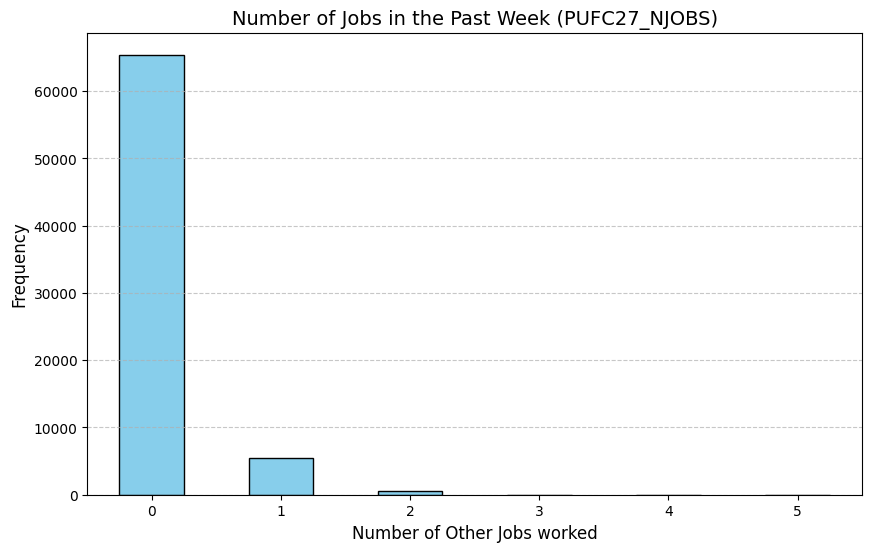

In [396]:
job_counts = jobs_df['PUFC27_NJOBS'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Jobs in the Past Week (PUFC27_NJOBS)', fontsize=14)
plt.xlabel('Number of Other Jobs worked', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Total Hours Worked For All Jobs variable (PUFC28_THOURS)
According to the valueset, respondents put a range from the following:
* 1-48 hours
* 49-168 hours
* 0 hours
* blank = Not Applicable

First, let's get some info about our data, like what datatype.

In [397]:
print(jobs_df['PUFC28_THOURS'].unique())
print()
print(jobs_df['PUFC28_THOURS'].info())

['032' '008' '034' '033' '072' '048' '010' '020' '060' '024' '040' '056'
 '047' '044' '070' '004' '016' '045' '050' '055' '015' '003' '002' '042'
 '063' '054' '036' '007' '052' '006' '014' '012' '028' '018' '030' '025'
 '000' '091' '035' '046' '038' '009' '043' '023' '011' '084' '064' '013'
 '021' '065' '061' '078' '090' '005' '080' '049' '066' '022' '077' '057'
 '098' '059' '039' '029' '105' '041' '027' '031' '062' '051' '087' '026'
 '112' '019' '037' '096' '094' '053' '001' '017' '089' '074' '071' '058'
 '069' '075' '068' '083' '076' '092' '102' '086' '109' '100' '081' '103'
 '088' '108' '085' '093' '099' '110' '073' '082' '106' '067' '079' '101'
 '095' '104']

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC28_THOURS
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None


We found that all values are `objects`. We also noticed that there are 0's infront of values that aren't 3 digits. When we convert all the objects to int, it will take care of these leading zeros. But first let's check for whitespaces in the data.

In [398]:
whitespace_count = (jobs_df['PUFC28_THOURS'].astype(str).str.strip() == '').sum()
whitespace_count

0

There are no whitespaces in the data, so let's convert all of them into `int`.

In [399]:
jobs_df['PUFC28_THOURS'] = jobs_df['PUFC28_THOURS'].astype('int')
print(jobs_df['PUFC28_THOURS'].info()) # using this to check if the conversion worked
print(jobs_df['PUFC28_THOURS'].value_counts())

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC28_THOURS
Non-Null Count  Dtype
--------------  -----
71355 non-null  int32
dtypes: int32(1)
memory usage: 836.2 KB
None
PUFC28_THOURS
48     18094
40      8624
56      3412
24      2717
60      2710
       ...  
95         2
103        1
109        1
101        1
104        1
Name: count, Length: 110, dtype: int64


Let's check the distribution of the variables using a boxplot.

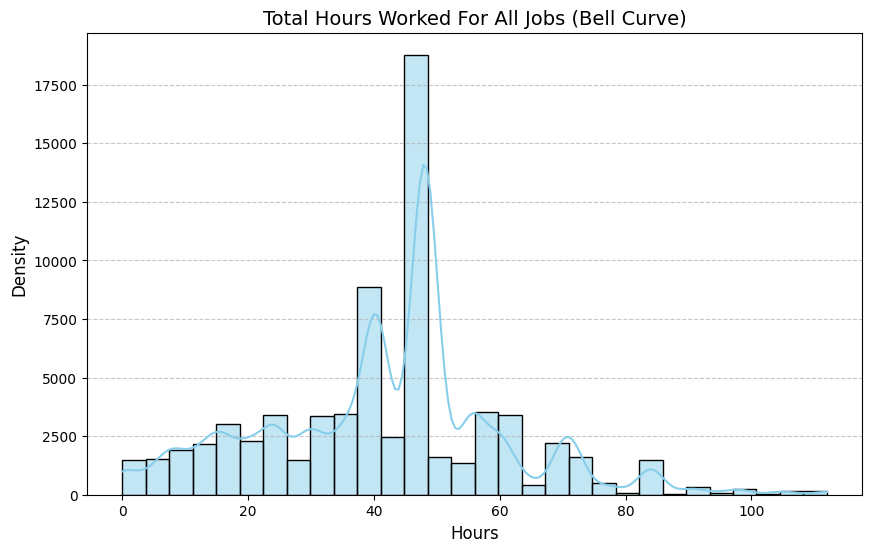

In [400]:
plt.figure(figsize=(10, 6))
sns.histplot(jobs_df['PUFC28_THOURS'], kde=True, color='skyblue', edgecolor='black', bins=30)

plt.title('Total Hours Worked For All Jobs (Bell Curve)', fontsize=14)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [401]:
jobs_df['PUFC28_THOURS'] = np.log1p(jobs_df['PUFC28_THOURS'])

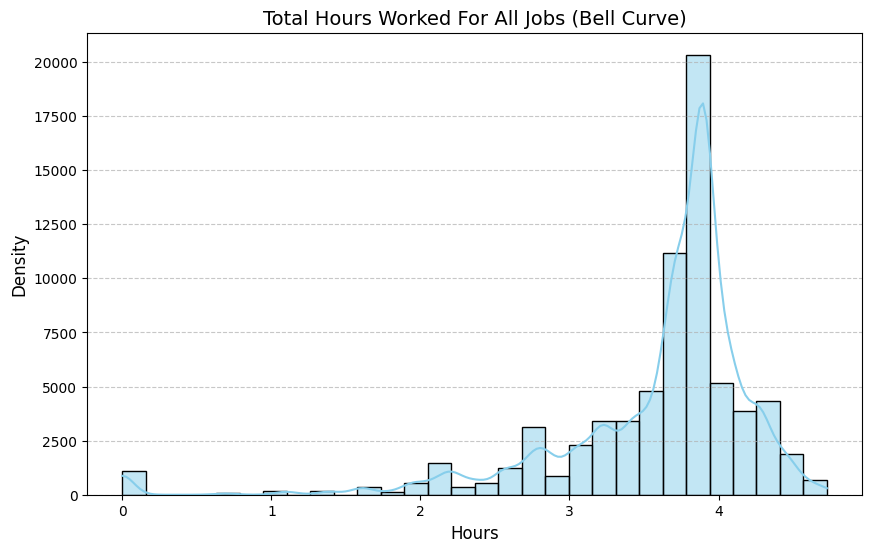

In [402]:
plt.figure(figsize=(10, 6))
sns.histplot(jobs_df['PUFC28_THOURS'], kde=True, color='skyblue', edgecolor='black', bins=30)

plt.title('Total Hours Worked For All Jobs (Bell Curve)', fontsize=14)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Number of Household Members variable (PUFHHSIZE)

In [403]:
jobs_df['PUFHHSIZE'].unique()

array([ 3,  4,  5,  1,  6,  8,  7, 12,  2, 14,  9, 10, 11, 13, 18, 16, 15,
       23, 17, 19], dtype=int64)

We will also convert the data type to `int` to make it easier to work with.

In [404]:
jobs_df['PUFHHSIZE'] = jobs_df['PUFHHSIZE'].astype('int')

We can check for whitespace values to see if there are any.

In [405]:
whitespace_count = (jobs_df['PUFHHSIZE'].astype(str).str.strip() == '').sum()
whitespace_count

0

We can proceed to checking the distribution of the variable.

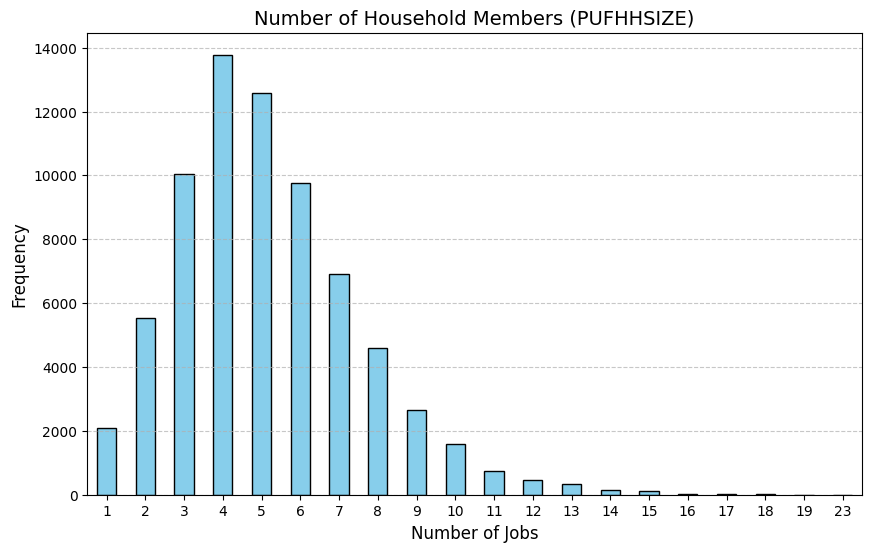

In [406]:
job_counts = jobs_df['PUFHHSIZE'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Household Members (PUFHHSIZE)', fontsize=14)
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Basic Pay variable (PUFC25_PBASIC)

In [407]:
jobs_df['PUFC25_PBASIC'].unique()

array(['     ', '00250', '00115', ..., '00728', '01573', '00922'],
      dtype=object)

In [408]:
# Turning the white space value into NaN
jobs_df['PUFC25_PBASIC'] = jobs_df['PUFC25_PBASIC'].replace(r'^\s*$', np.nan, regex=True)

jobs_df['PUFC25_PBASIC'].isnull().sum()

34767

In order to deal with the `NaN` values, we will set the value to 0 and convert the data type into integer to make it easier to work with later on.

We will also convert the data type to `int` to make it easier to work with.

In [409]:
# Setting the null value to 0
jobs_df['PUFC25_PBASIC'].fillna(0, inplace=True)

# Setting the dtype to int
jobs_df['PUFC25_PBASIC'] = jobs_df['PUFC25_PBASIC'].astype(int)

jobs_df['PUFC25_PBASIC'].unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_35616\3495477199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jobs_df['PUFC25_PBASIC'].fillna(0, inplace=True)


array([   0,  250,  115, ...,  728, 1573,  922])

Since `0` represent data that we want to disregard, we will tackle the rest of Basic Pay per Day without the `0` values.

We will also visualize our data so we can see the distribution of our data.

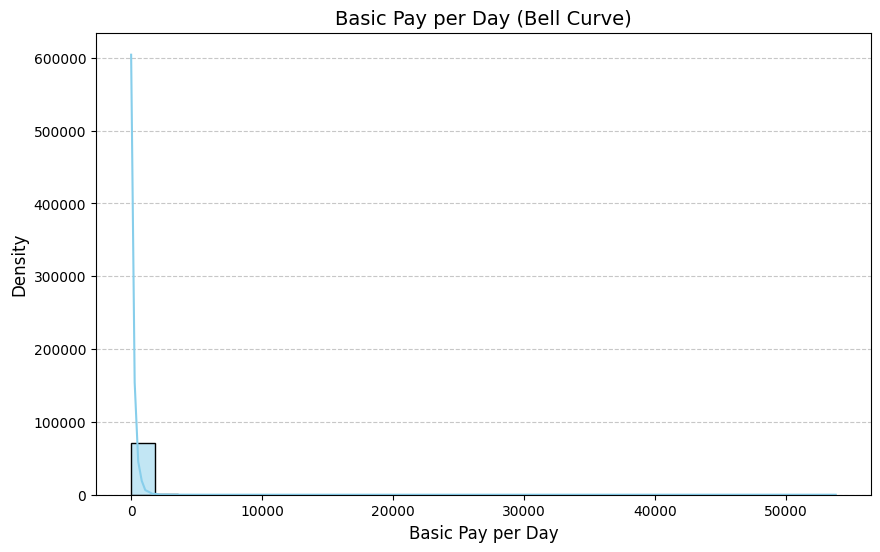

In [410]:
plt.figure(figsize=(10, 6))
sns.histplot(jobs_df['PUFC25_PBASIC'], kde=True, color='skyblue', edgecolor='black', bins=30)

plt.title('Basic Pay per Day (Bell Curve)', fontsize=14)
plt.xlabel('Basic Pay per Day', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Since we still have 1 outlier, we can simply just get rid of it by excluding it.

In [411]:
jobs_df = jobs_df[jobs_df['PUFC25_PBASIC'] <= 20000]

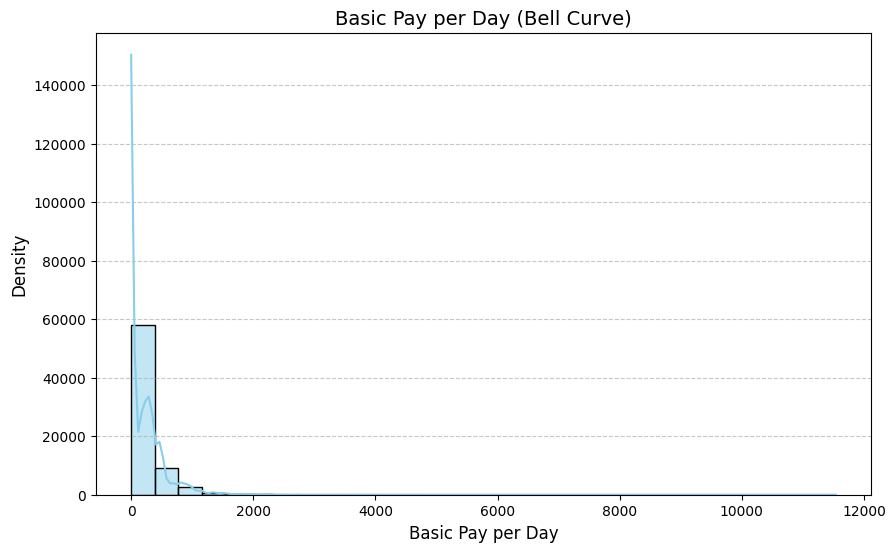

In [412]:
plt.figure(figsize=(10, 6))
sns.histplot(jobs_df['PUFC25_PBASIC'], kde=True, color='skyblue', edgecolor='black', bins=30)

plt.title('Basic Pay per Day (Bell Curve)', fontsize=14)
plt.xlabel('Basic Pay per Day', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Since the data is still skewed, we can implement log transformation to normalize the distribution.

In [413]:
jobs_df['PUFC25_PBASIC'] = np.log1p(jobs_df['PUFC25_PBASIC'])

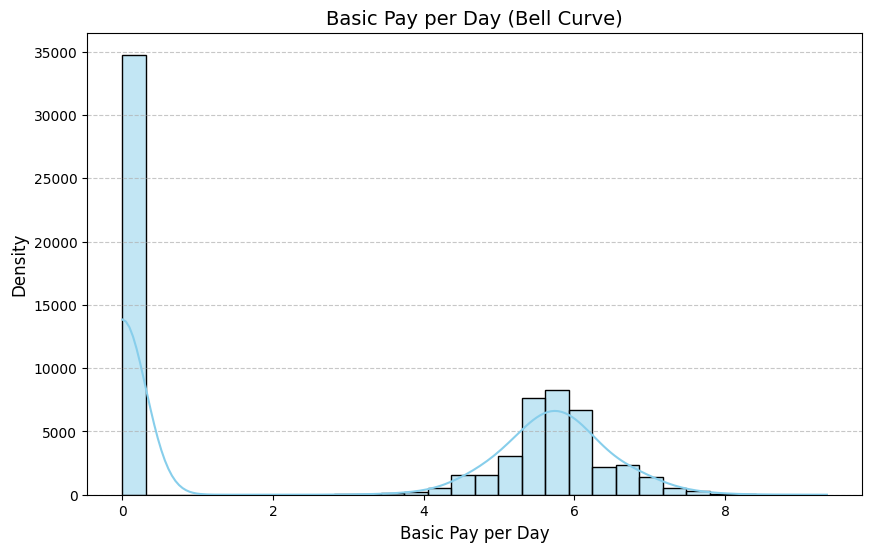

In [414]:
plt.figure(figsize=(10, 6))
sns.histplot(jobs_df['PUFC25_PBASIC'], kde=True, color='skyblue', edgecolor='black', bins=30)

plt.title('Basic Pay per Day (Bell Curve)', fontsize=14)
plt.xlabel('Basic Pay per Day', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The log transformation will provide us with the proportionality of the data, despite it not keeping the extreme values.

### Age variable (PUFC05_AGE)

`PUFC05_AGE` represents the age of the respondent as of their last birthday.

We first need to assess what range we are dealing with for the age.

In [415]:
jobs_df['PUFC05_AGE'].unique()

array([49, 61, 19, 48, 41, 20, 59, 51, 23, 71, 54, 27, 46, 43, 38, 35, 72,
       74, 39, 22, 44, 34, 17, 53, 40, 26, 45, 37, 52, 55, 68, 56, 30, 25,
       65, 62, 33, 29, 24, 32, 31, 57, 21, 50, 47, 63, 28, 60, 42, 79, 58,
       64, 16, 69, 66, 36, 18, 70, 81, 76, 67, 78, 93, 75, 73, 77, 80, 87,
       15, 85, 83, 82, 84, 86, 88, 95, 90, 91, 96, 92, 89, 99],
      dtype=int64)

We can see that some of the unique variables go above your typical working age so we need to check if there are outliers within our data.

In [416]:
jobs_df['PUFC05_AGE'] = jobs_df['PUFC05_AGE'].astype(int)

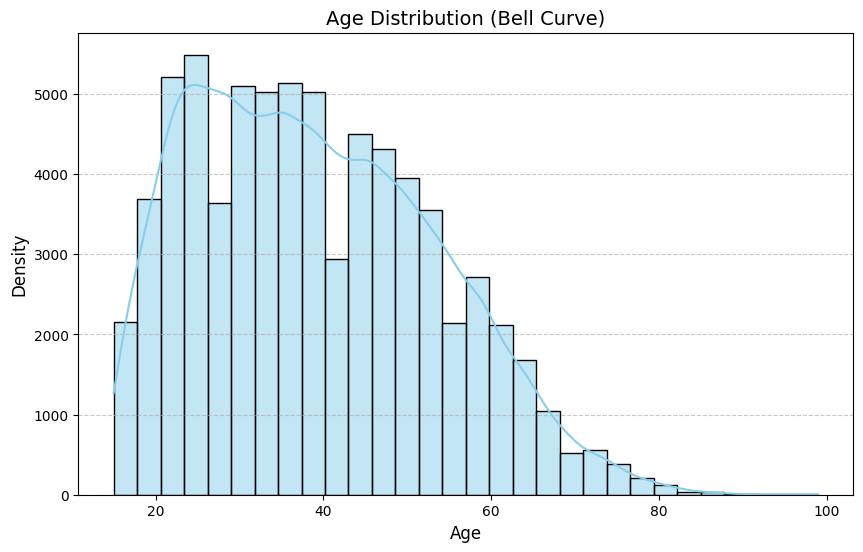

In [417]:
plt.figure(figsize=(10, 6))
sns.histplot(jobs_df['PUFC05_AGE'], kde=True, color='skyblue', edgecolor='black', bins=30)

plt.title('Age Distribution (Bell Curve)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Using the boxplot, we can easily spot the outliers in our data represented by the circles.

Since the outliers seem to be fairly manageable, we can do mean imputation to normalize the data.

In [418]:
# Computing for the IQR

age_q1 = jobs_df['PUFC05_AGE'].quantile(0.25)
age_q3 = jobs_df['PUFC05_AGE'].quantile(0.75)
age_iqr = age_q3 - age_q1

# Getting the outliers

age_lw = age_q1 - 2 * age_iqr
age_uw = age_q3 + 2 * age_iqr
age_outliers = jobs_df[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw)]
age_outliers['PUFC05_AGE'].shape[0]

8

Let's get the mean of the ages without the outliers

In [419]:
mean_val = jobs_df[(jobs_df['PUFC05_AGE'] >= age_lw) & (jobs_df['PUFC05_AGE'] <= age_uw)]['PUFC05_AGE'].mean()
mean_val

39.07487455498556

After getting the mean, we will use it to set the values of the outliers for the mean imputation.

In [420]:
jobs_df.loc[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw), 'PUFC05_AGE'] = mean_val
outlier_count_after = jobs_df[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw)].shape[0]
print("Number of outliers after imputation:", outlier_count_after)

Number of outliers after imputation: 0


C:\Users\Admin\AppData\Local\Temp\ipykernel_35616\1394142130.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '39.07487455498556' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  jobs_df.loc[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw), 'PUFC05_AGE'] = mean_val


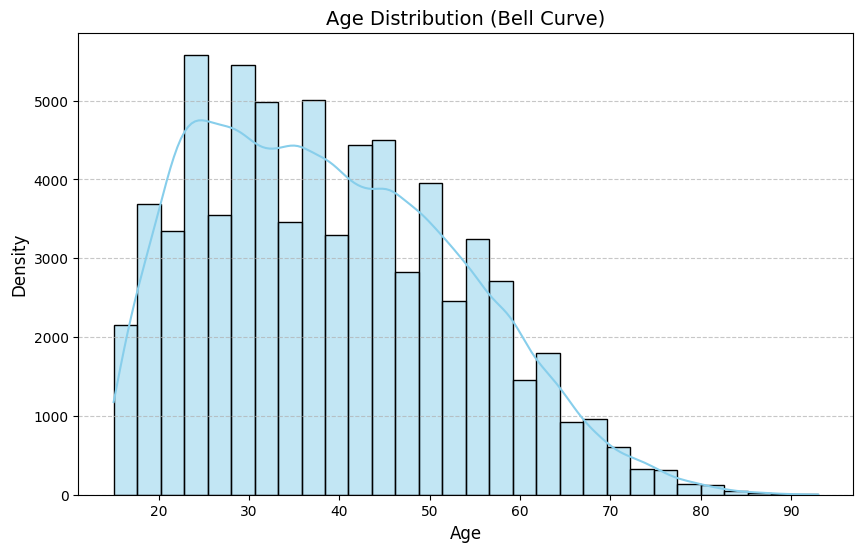

In [421]:
plt.figure(figsize=(10, 6))
sns.histplot(jobs_df['PUFC05_AGE'], kde=True, color='skyblue', edgecolor='black', bins=30)

plt.title('Age Distribution (Bell Curve)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Work Hours per Day variable (PUFC18_PNWHRS)

`PUFC18_PNWHRS` represent the different normal working hours per day ranging from 1 to 16.

In [422]:
jobs_df['PUFC18_PNWHRS'].unique()

array(['08', '04', '12', '10', '02', '03', '06', '09', '07', '05', '01',
       '13', '15', '14', '11', '16'], dtype=object)

We can convert this data into an integer type in order to easily work with the data later on.

In [423]:
jobs_df['PUFC18_PNWHRS'] = jobs_df['PUFC18_PNWHRS'].astype(int)
jobs_df['PUFC18_PNWHRS'].unique()

array([ 8,  4, 12, 10,  2,  3,  6,  9,  7,  5,  1, 13, 15, 14, 11, 16])

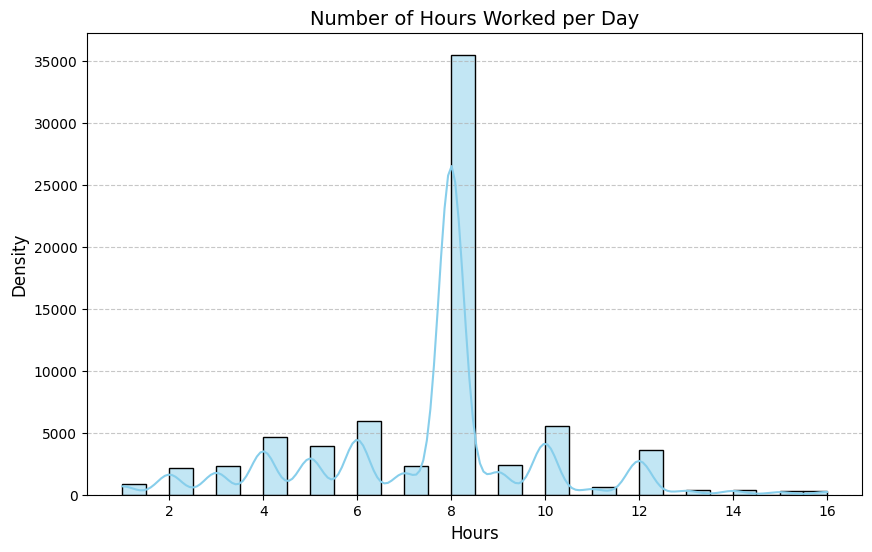

In [424]:
plt.figure(figsize=(10, 6))
sns.histplot(jobs_df['PUFC18_PNWHRS'], kde=True, color='skyblue', edgecolor='black', bins=30)

plt.title('Number of Hours Worked per Day', fontsize=14)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Total Work Hours variable (PUFC19_PHOURS)

`PUFC19_PHOURS` represent the total work hours in the past week, including the primary and secondary occupation (if any).

The value set includes numbers ranging from 0 to 112, for the work hours wherein 0 represents the non-workers in the survey and 999 for not reported.

In [425]:
jobs_df['PUFC19_PHOURS'].unique()

array(['024', '008', '020', '072', '048', '010', '060', '016', '040',
       '070', '004', '032', '045', '030', '015', '003', '002', '042',
       '063', '054', '036', '007', '028', '006', '014', '012', '018',
       '056', '025', '000', '091', '035', '021', '009', '084', '090',
       '050', '005', '049', '066', '044', '077', '057', '098', '105',
       '052', '064', '065', '059', '027', '055', '112', '022', '038',
       '096', '078', '033', '001', '089', '058', '075', '071', '053',
       '062', '039', '031', '011', '034', '043', '026', '103', '094',
       '047', '108', '041', '046', '013', '080', '100', '017', '092',
       '029', '102', '082', '088', '076', '093', '051', '019', '074',
       '068', '061', '067', '069', '073', '101', '086', '023', '037',
       '081', '079', '085'], dtype=object)

The data does not include 0 and 999 anymore as we have been able to filter the data previously to only accommodate the working respondents.

However, similar to our previous variable, we can also convert the data type into integer so it will be easier to work with it later on.

In [426]:
jobs_df['PUFC19_PHOURS'] = jobs_df['PUFC19_PHOURS'].astype(int)
jobs_df['PUFC19_PHOURS'].unique()

array([ 24,   8,  20,  72,  48,  10,  60,  16,  40,  70,   4,  32,  45,
        30,  15,   3,   2,  42,  63,  54,  36,   7,  28,   6,  14,  12,
        18,  56,  25,   0,  91,  35,  21,   9,  84,  90,  50,   5,  49,
        66,  44,  77,  57,  98, 105,  52,  64,  65,  59,  27,  55, 112,
        22,  38,  96,  78,  33,   1,  89,  58,  75,  71,  53,  62,  39,
        31,  11,  34,  43,  26, 103,  94,  47, 108,  41,  46,  13,  80,
       100,  17,  92,  29, 102,  82,  88,  76,  93,  51,  19,  74,  68,
        61,  67,  69,  73, 101,  86,  23,  37,  81,  79,  85])

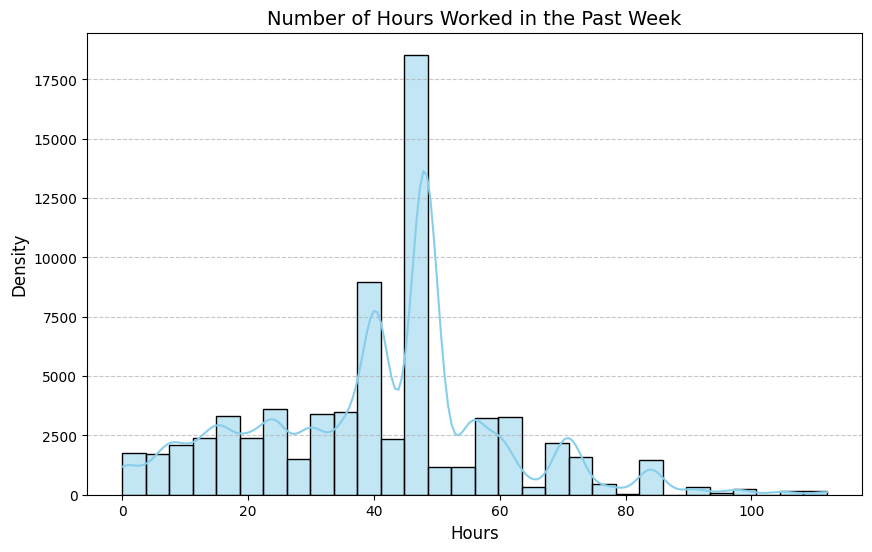

In [427]:
plt.figure(figsize=(10, 6))
sns.histplot(jobs_df['PUFC19_PHOURS'], kde=True, color='skyblue', edgecolor='black', bins=30)

plt.title('Number of Hours Worked in the Past Week', fontsize=14)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [428]:
jobs_df.head(20)

,PUFREG,PUFURB2K10,PUFHHSIZE,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC08_CURSCH,PUFC09_GRADTECH,...,PUFC23_PCLASS,PUFC24_PBASIS,PUFC25_PBASIC,PUFC26_OJOB,PUFC27_NJOBS,PUFC28_THOURS,PUFC29_WWM48H,PUFC41_WQTR,PUFC43_QKB,PUFC16_PKB_GENERAL
0,Region I - Ilocos Region,Rural,3,Head,M,49.0,Married,High School Graduate,no,no,...,Self Employed,Monthly,0.000000,yes,1,3.496508,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
1,Region I - Ilocos Region,Rural,3,Wife/Spouse,F,61.0,Married,High School Graduate,no,no,...,Without Pay (Family Owned Business),Monthly,0.000000,no,0,2.197225,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
2,Region I - Ilocos Region,Rural,3,Son/daughter,M,19.0,Single,High School Graduate,no,no,...,Private Establishment,Per Day,5.525453,yes,1,3.555348,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
3,Region I - Ilocos Region,Rural,4,Head,M,48.0,Married,Second Year High School,no,no,...,Self Employed,Monthly,0.000000,yes,2,3.526361,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
4,Region I - Ilocos Region,Rural,4,Wife/Spouse,F,41.0,Married,High School Graduate,no,no,...,Private Household,Monthly,4.753590,no,0,4.290459,Requirements of the job,yes,Other Personal Service Activities,Services
5,Region I - Ilocos Region,Rural,4,Son/daughter,M,20.0,Single,High School Graduate,no,no,...,Private Establishment,Per Day,5.303305,no,0,3.891820,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Services
7,Region I - Ilocos Region,Rural,4,Head,M,59.0,Married,High School Graduate,no,no,...,Self Employed,Monthly,0.000000,yes,1,3.496508,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
8,Region I - Ilocos Region,Rural,4,Wife/Spouse,F,61.0,Married,High School Graduate,no,no,...,Gov't/Gov't Corporation,Commission Basis,0.000000,no,0,2.397895,Other reasons,yes,Public Administration and Defense; Compulsory ...,Services
11,Region I - Ilocos Region,Rural,4,Head,M,51.0,Married,High School Graduate,no,no,...,Self Employed,Monthly,0.000000,no,0,3.044522,Other reasons,yes,Land Transport and Transport via Pipelines,Services
14,Region I - Ilocos Region,Rural,4,Son/daughter,M,23.0,Single,High School Graduate,no,no,...,Private Establishment,Monthly,5.817111,no,0,4.110874,Wanted more earnings,yes,Security and Investigation Activities,Services


### Dataset Overview

Here we are getting a few summaries to get a better understanding of the dataset.
We do this by getting the first few rows, a summary of the dataset structure, and a statistical summary.

In [429]:
display(jobs_df.head())
print(jobs_df.info())
print(jobs_df.describe())

,PUFREG,PUFURB2K10,PUFHHSIZE,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC08_CURSCH,PUFC09_GRADTECH,...,PUFC23_PCLASS,PUFC24_PBASIS,PUFC25_PBASIC,PUFC26_OJOB,PUFC27_NJOBS,PUFC28_THOURS,PUFC29_WWM48H,PUFC41_WQTR,PUFC43_QKB,PUFC16_PKB_GENERAL
0,Region I - Ilocos Region,Rural,3,Head,M,49.0,Married,High School Graduate,no,no,...,Self Employed,Monthly,0.000000,yes,1,3.496508,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
1,Region I - Ilocos Region,Rural,3,Wife/Spouse,F,61.0,Married,High School Graduate,no,no,...,Without Pay (Family Owned Business),Monthly,0.000000,no,0,2.197225,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
2,Region I - Ilocos Region,Rural,3,Son/daughter,M,19.0,Single,High School Graduate,no,no,...,Private Establishment,Per Day,5.525453,yes,1,3.555348,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
3,Region I - Ilocos Region,Rural,4,Head,M,48.0,Married,Second Year High School,no,no,...,Self Employed,Monthly,0.000000,yes,2,3.526361,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
4,Region I - Ilocos Region,Rural,4,Wife/Spouse,F,41.0,Married,High School Graduate,no,no,...,Private Household,Monthly,4.753590,no,0,4.290459,Requirements of the job,yes,Other Personal Service Activities,Services


<class 'pandas.core.frame.DataFrame'>
Index: 71354 entries, 0 to 180861
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PUFREG              71354 non-null  string  
 1   PUFURB2K10          71354 non-null  string  
 2   PUFHHSIZE           71354 non-null  int32   
 3   PUFC03_REL          71354 non-null  string  
 4   PUFC04_SEX          71354 non-null  string  
 5   PUFC05_AGE          71354 non-null  float64 
 6   PUFC06_MSTAT        71354 non-null  string  
 7   PUFC07_GRADE        71354 non-null  string  
 8   PUFC08_CURSCH       71354 non-null  object  
 9   PUFC09_GRADTECH     71354 non-null  object  
 10  PUFC10_CONWR        71354 non-null  string  
 11  PUFC11_WORK         71354 non-null  object  
 12  PUFC12_JOB          71354 non-null  object  
 13  PUFC14_PROCC        71354 non-null  category
 14  PUFC16_PKB          71344 non-null  category
 15  PUFC17_NATEM        71354 non-null  obje

### Data preprocessing for PUFC14_PROCC 
We use ANOVA because we want to compare the variance of different numerical variables with the different categories of our target variable (categorical) PUFC14_PROCC.

In [430]:
numerical_columns = jobs_df.select_dtypes(include=['int', 'float']).columns
anova_results = []

for col in numerical_columns:
    if col != 'PUFC14_PROCC':
        groups = [jobs_df[jobs_df['PUFC14_PROCC'] == category][col] for category in jobs_df['PUFC14_PROCC'].unique()]
        f_stat, p_value = f_oneway(*groups)
        anova_results.append((col, f_stat, p_value))

anova_df = pd.DataFrame(anova_results, columns=['Variable', 'F-Statistic', 'P-Value'])
anova_df = anova_df.sort_values(by='F-Statistic', ascending=True)

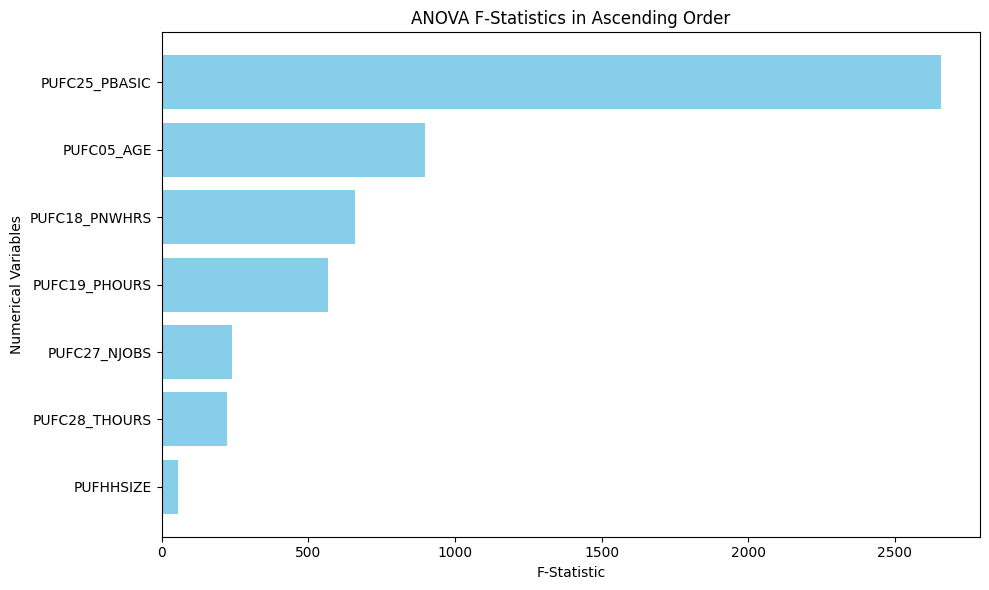

In [431]:
plt.figure(figsize=(10, 6))
plt.barh(anova_df['Variable'], anova_df['F-Statistic'], color='skyblue')
plt.xlabel('F-Statistic')
plt.ylabel('Numerical Variables')
plt.title('ANOVA F-Statistics in Ascending Order')
plt.tight_layout()
plt.show()

We can use the anova P-Value to find significant differences between the group means of each numerical variable with the outputs of our target variable.

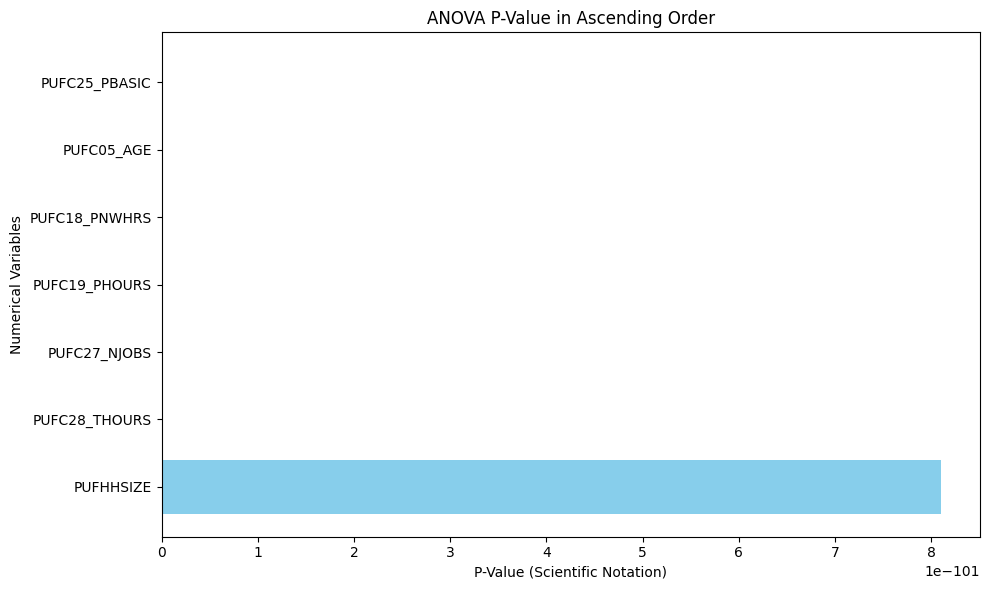

In [432]:
anova_df['P-Value'] = anova_df['P-Value'].apply(lambda x: f"{x:.2e}")
plt.figure(figsize=(10, 6))
plt.barh(anova_df['Variable'], anova_df['P-Value'].astype(float), color='skyblue')
plt.xlabel('P-Value (Scientific Notation)')
plt.ylabel('Numerical Variables')
plt.title('ANOVA P-Value in Ascending Order')
plt.tight_layout()
plt.show()

We can then use a heat map between numerical variables to find the correlation between each numerical variable.

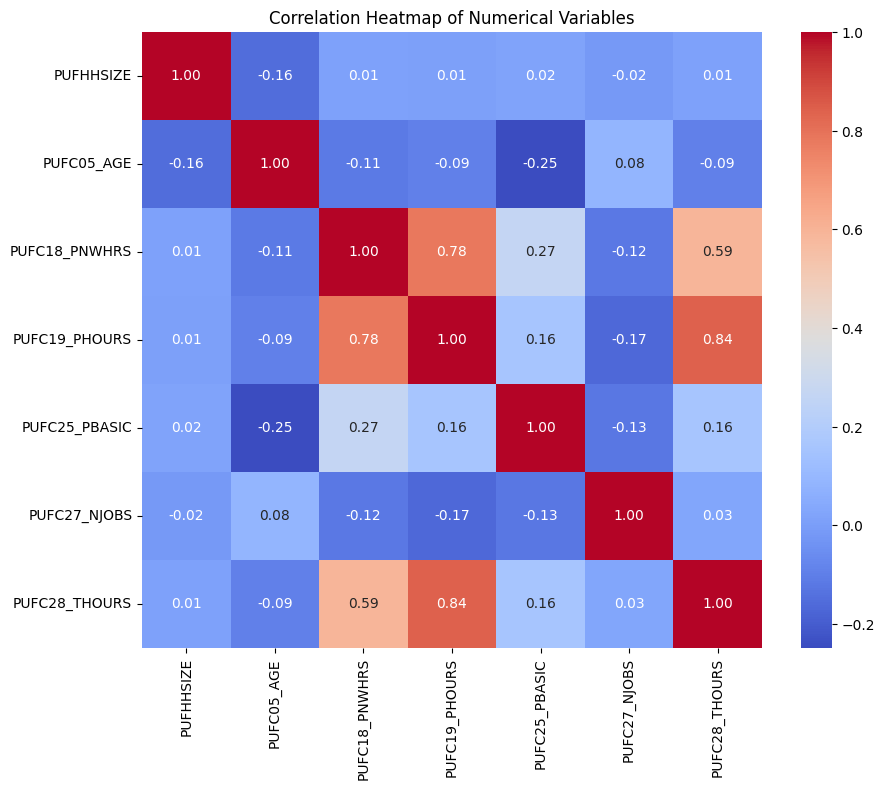

In [433]:
numerical_data = jobs_df.select_dtypes(include=['int','float'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### Observations (Numerical)
<span style="background-color:green">TODO</span>

---
# **Section 5: Exploratory Data Analysis (EDA)**

- print distributions for everything
- get a heatmap
- t-tests between all the different vars and the target var

### Dataset Overview

Here we are getting a few summaries to get a better understanding of the dataset.
We do this by getting the first few rows, a summary of the dataset structure, and a statistical summary.

In [434]:
display(jobs_df.head())

,PUFREG,PUFURB2K10,PUFHHSIZE,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC08_CURSCH,PUFC09_GRADTECH,...,PUFC23_PCLASS,PUFC24_PBASIS,PUFC25_PBASIC,PUFC26_OJOB,PUFC27_NJOBS,PUFC28_THOURS,PUFC29_WWM48H,PUFC41_WQTR,PUFC43_QKB,PUFC16_PKB_GENERAL
0,Region I - Ilocos Region,Rural,3,Head,M,49.0,Married,High School Graduate,no,no,...,Self Employed,Monthly,0.000000,yes,1,3.496508,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
1,Region I - Ilocos Region,Rural,3,Wife/Spouse,F,61.0,Married,High School Graduate,no,no,...,Without Pay (Family Owned Business),Monthly,0.000000,no,0,2.197225,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
2,Region I - Ilocos Region,Rural,3,Son/daughter,M,19.0,Single,High School Graduate,no,no,...,Private Establishment,Per Day,5.525453,yes,1,3.555348,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
3,Region I - Ilocos Region,Rural,4,Head,M,48.0,Married,Second Year High School,no,no,...,Self Employed,Monthly,0.000000,yes,2,3.526361,Other reasons,yes,"Crop and Animal Production, Hunting and Relate...",Agricultural
4,Region I - Ilocos Region,Rural,4,Wife/Spouse,F,41.0,Married,High School Graduate,no,no,...,Private Household,Monthly,4.753590,no,0,4.290459,Requirements of the job,yes,Other Personal Service Activities,Services


In [435]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71354 entries, 0 to 180861
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PUFREG              71354 non-null  string  
 1   PUFURB2K10          71354 non-null  string  
 2   PUFHHSIZE           71354 non-null  int32   
 3   PUFC03_REL          71354 non-null  string  
 4   PUFC04_SEX          71354 non-null  string  
 5   PUFC05_AGE          71354 non-null  float64 
 6   PUFC06_MSTAT        71354 non-null  string  
 7   PUFC07_GRADE        71354 non-null  string  
 8   PUFC08_CURSCH       71354 non-null  object  
 9   PUFC09_GRADTECH     71354 non-null  object  
 10  PUFC10_CONWR        71354 non-null  string  
 11  PUFC11_WORK         71354 non-null  object  
 12  PUFC12_JOB          71354 non-null  object  
 13  PUFC14_PROCC        71354 non-null  category
 14  PUFC16_PKB          71344 non-null  category
 15  PUFC17_NATEM        71354 non-null  obje

In [436]:
print("Dataset Shape: ",jobs_df.shape)
print("\nColumn Data Types:")
print(jobs_df.dtypes)

# Statistics for Mumerical Features
print("\nNumerical Summary: ")
print(jobs_df.describe())

# Statistics for Categorical Features
print("\nCategorical Summary: ")
print(jobs_df.describe(include="object"))

# Statistics for Categorical Features
print("\nCategorical(String) Summary: ")
print(jobs_df.describe(include="string"))

Dataset Shape:  (71354, 31)

Column Data Types:
PUFREG                string[python]
PUFURB2K10            string[python]
PUFHHSIZE                      int32
PUFC03_REL            string[python]
PUFC04_SEX            string[python]
PUFC05_AGE                   float64
PUFC06_MSTAT          string[python]
PUFC07_GRADE          string[python]
PUFC08_CURSCH                 object
PUFC09_GRADTECH               object
PUFC10_CONWR          string[python]
PUFC11_WORK                   object
PUFC12_JOB                    object
PUFC14_PROCC                category
PUFC16_PKB                  category
PUFC17_NATEM                  object
PUFC18_PNWHRS                  int32
PUFC19_PHOURS                  int32
PUFC20_PWMORE                 object
PUFC21_PLADDW                 object
PUFC22_PFWRK                  object
PUFC23_PCLASS         string[python]
PUFC24_PBASIS         string[python]
PUFC25_PBASIC                float64
PUFC26_OJOB                   object
PUFC27_NJOBS               

In [437]:
jobs_df.isnull().sum()

PUFREG                 0
PUFURB2K10             0
PUFHHSIZE              0
PUFC03_REL             0
PUFC04_SEX             0
PUFC05_AGE             0
PUFC06_MSTAT           0
PUFC07_GRADE           0
PUFC08_CURSCH          0
PUFC09_GRADTECH        0
PUFC10_CONWR           0
PUFC11_WORK            0
PUFC12_JOB             0
PUFC14_PROCC           0
PUFC16_PKB            10
PUFC17_NATEM           0
PUFC18_PNWHRS          0
PUFC19_PHOURS          0
PUFC20_PWMORE          0
PUFC21_PLADDW          0
PUFC22_PFWRK           0
PUFC23_PCLASS          0
PUFC24_PBASIS          0
PUFC25_PBASIC          0
PUFC26_OJOB            0
PUFC27_NJOBS           0
PUFC28_THOURS          0
PUFC29_WWM48H          0
PUFC41_WQTR            0
PUFC43_QKB             0
PUFC16_PKB_GENERAL    10
dtype: int64

In [438]:
# display vars that have null count > 0
print(jobs_df.columns[jobs_df.isnull().sum() > 0])  # CURRENTLY FIGURING OUT WHY ITS LIKE THIS

Index(['PUFC16_PKB', 'PUFC16_PKB_GENERAL'], dtype='object')


Let's look at the 

### Data preprocessing for PUFC14_PROCC 
We use ANOVA because we want to compare the variance of different numerical variables with the different categories of our target variable (categorical) PUFC14_PROCC.

In [439]:
numerical_columns = jobs_df.select_dtypes(include=['int', 'float']).columns
anova_results = []

for col in numerical_columns:
    if col != 'PUFC14_PROCC':
        groups = [jobs_df[jobs_df['PUFC14_PROCC'] == category][col] for category in jobs_df['PUFC14_PROCC'].unique()]
        f_stat, p_value = f_oneway(*groups)
        anova_results.append((col, f_stat, p_value))

anova_df = pd.DataFrame(anova_results, columns=['Variable', 'F-Statistic', 'P-Value'])
anova_df = anova_df.sort_values(by='F-Statistic', ascending=True)

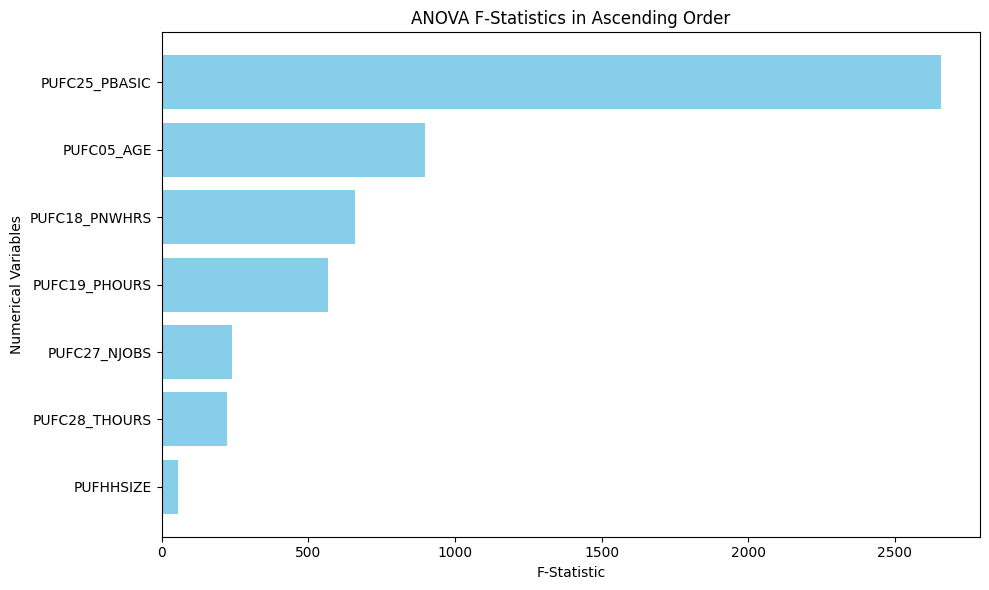

In [440]:
plt.figure(figsize=(10, 6))
plt.barh(anova_df['Variable'], anova_df['F-Statistic'], color='skyblue')
plt.xlabel('F-Statistic')
plt.ylabel('Numerical Variables')
plt.title('ANOVA F-Statistics in Ascending Order')
plt.tight_layout()
plt.show()

We can use the anova P-Value to find significant differences between the group means of each numerical variable with the outputs of our target variable.

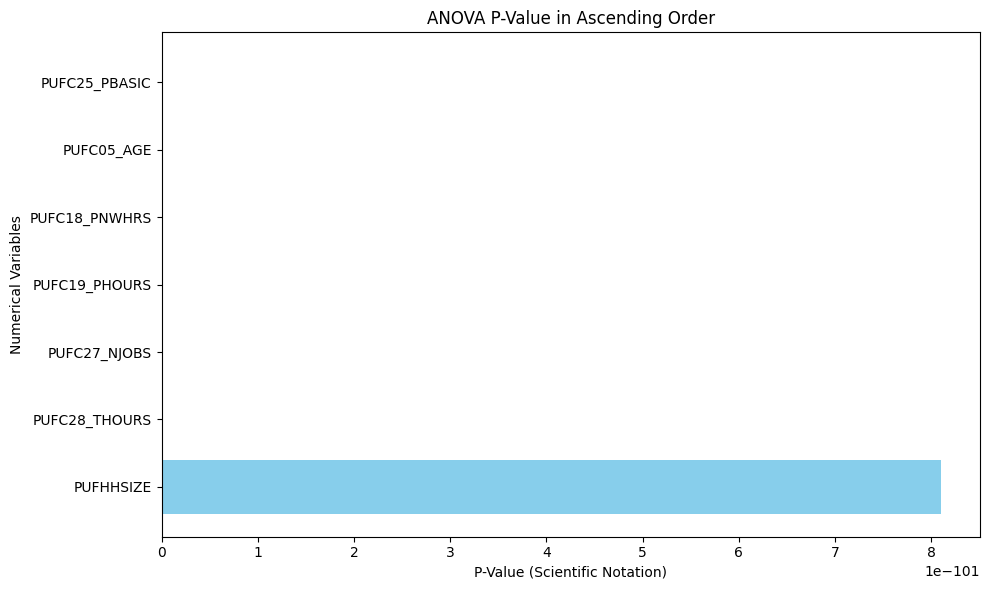

In [441]:
anova_df['P-Value'] = anova_df['P-Value'].apply(lambda x: f"{x:.2e}")
plt.figure(figsize=(10, 6))
plt.barh(anova_df['Variable'], anova_df['P-Value'].astype(float), color='skyblue')
plt.xlabel('P-Value (Scientific Notation)')
plt.ylabel('Numerical Variables')
plt.title('ANOVA P-Value in Ascending Order')
plt.tight_layout()
plt.show()

We can then use a heat map between numerical variables to find the correlation between each numerical variable.

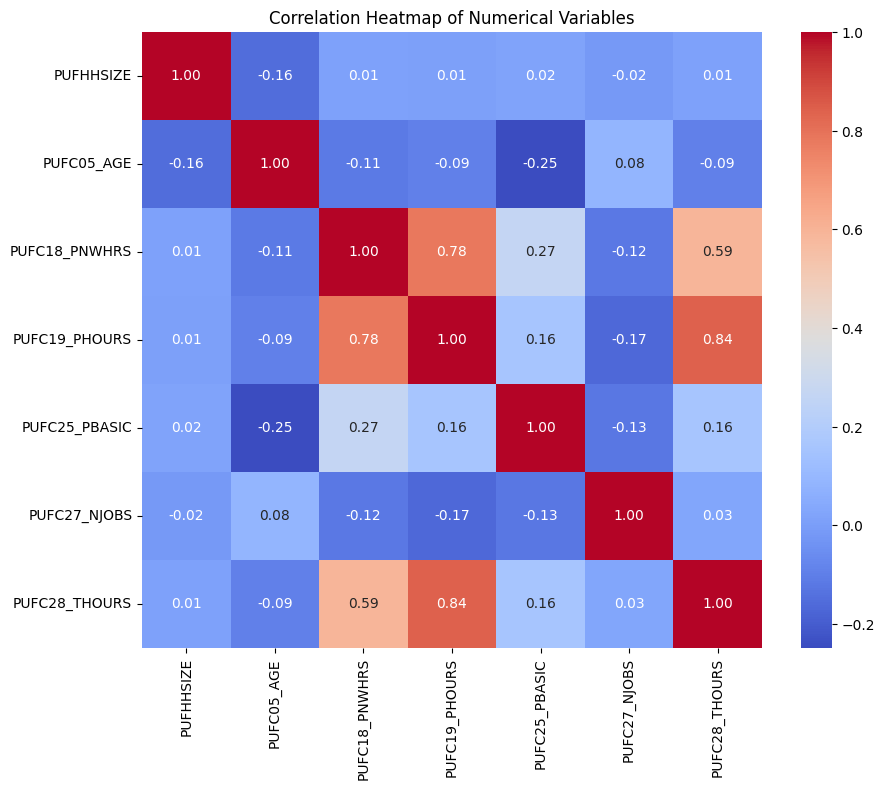

In [442]:
numerical_data = jobs_df.select_dtypes(include=['int','float'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### SUMMARY Observations (Numerical/Categorical EDA)

<span style="background-color:green">TO EXPLAIN</span>

### Binary Categorical/Categorical EDA
Here, we're going to be looking at the relationship between the **binary-categorical** variables and the target variable, `PUFC14_PROCC`, which is categorical.

This will show the percentage distribution of `PUFC14_PROCC` within each binary category. Helps identify trends ( if "yes" respondents are more likely to be in a particular category of `PUFC14_PROCC`).

In [443]:
binary_categorical_vars = [
    "PUFC08_CURSCH", "PUFC26_OJOB", "PUFC09_GRADTECH", "PUFC11_WORK", 
    "PUFC12_JOB", "PUFC20_PWMORE", "PUFC21_PLADDW", "PUFC22_PFWRK", "PUFC41_WQTR"
]

for var in binary_categorical_vars:
    print(f"Cross-tabulation of {var} and PUFC14_PROCC:")
    print(pd.crosstab(jobs_df[var], jobs_df["PUFC14_PROCC"], normalize="index") * 100)
    print("\n" + "-"*50 + "\n")

Cross-tabulation of PUFC08_CURSCH and PUFC14_PROCC:
PUFC14_PROCC   Armed Forces Occupations  Managers  Professionals  \
PUFC08_CURSCH                                                      
no                             0.105234  7.640300      14.631896   
yes                            0.000000  1.259446       2.468514   

PUFC14_PROCC   Technicians and Associate Professionals  \
PUFC08_CURSCH                                            
no                                            3.965748   
yes                                           1.057935   

PUFC14_PROCC   Clerical Support Workers  Service and Sales Workers  \
PUFC08_CURSCH                                                        
no                             4.385244                  13.072122   
yes                            2.670025                  24.433249   

PUFC14_PROCC   Skilled Agricultural, Forestry and Fishery Workers  \
PUFC08_CURSCH                                                       
no                     

Here:
- The first column (PUFC08_CURSCH, PUFC26_OJOB, etc.) represents a binary categorical variable (e.g., "yes" or "no").
- The second variable (PUFC14_PROCC) contains multiple categories (occupation types).

Next, we can use Seaborn's countplot to visualize the frequency distribution.

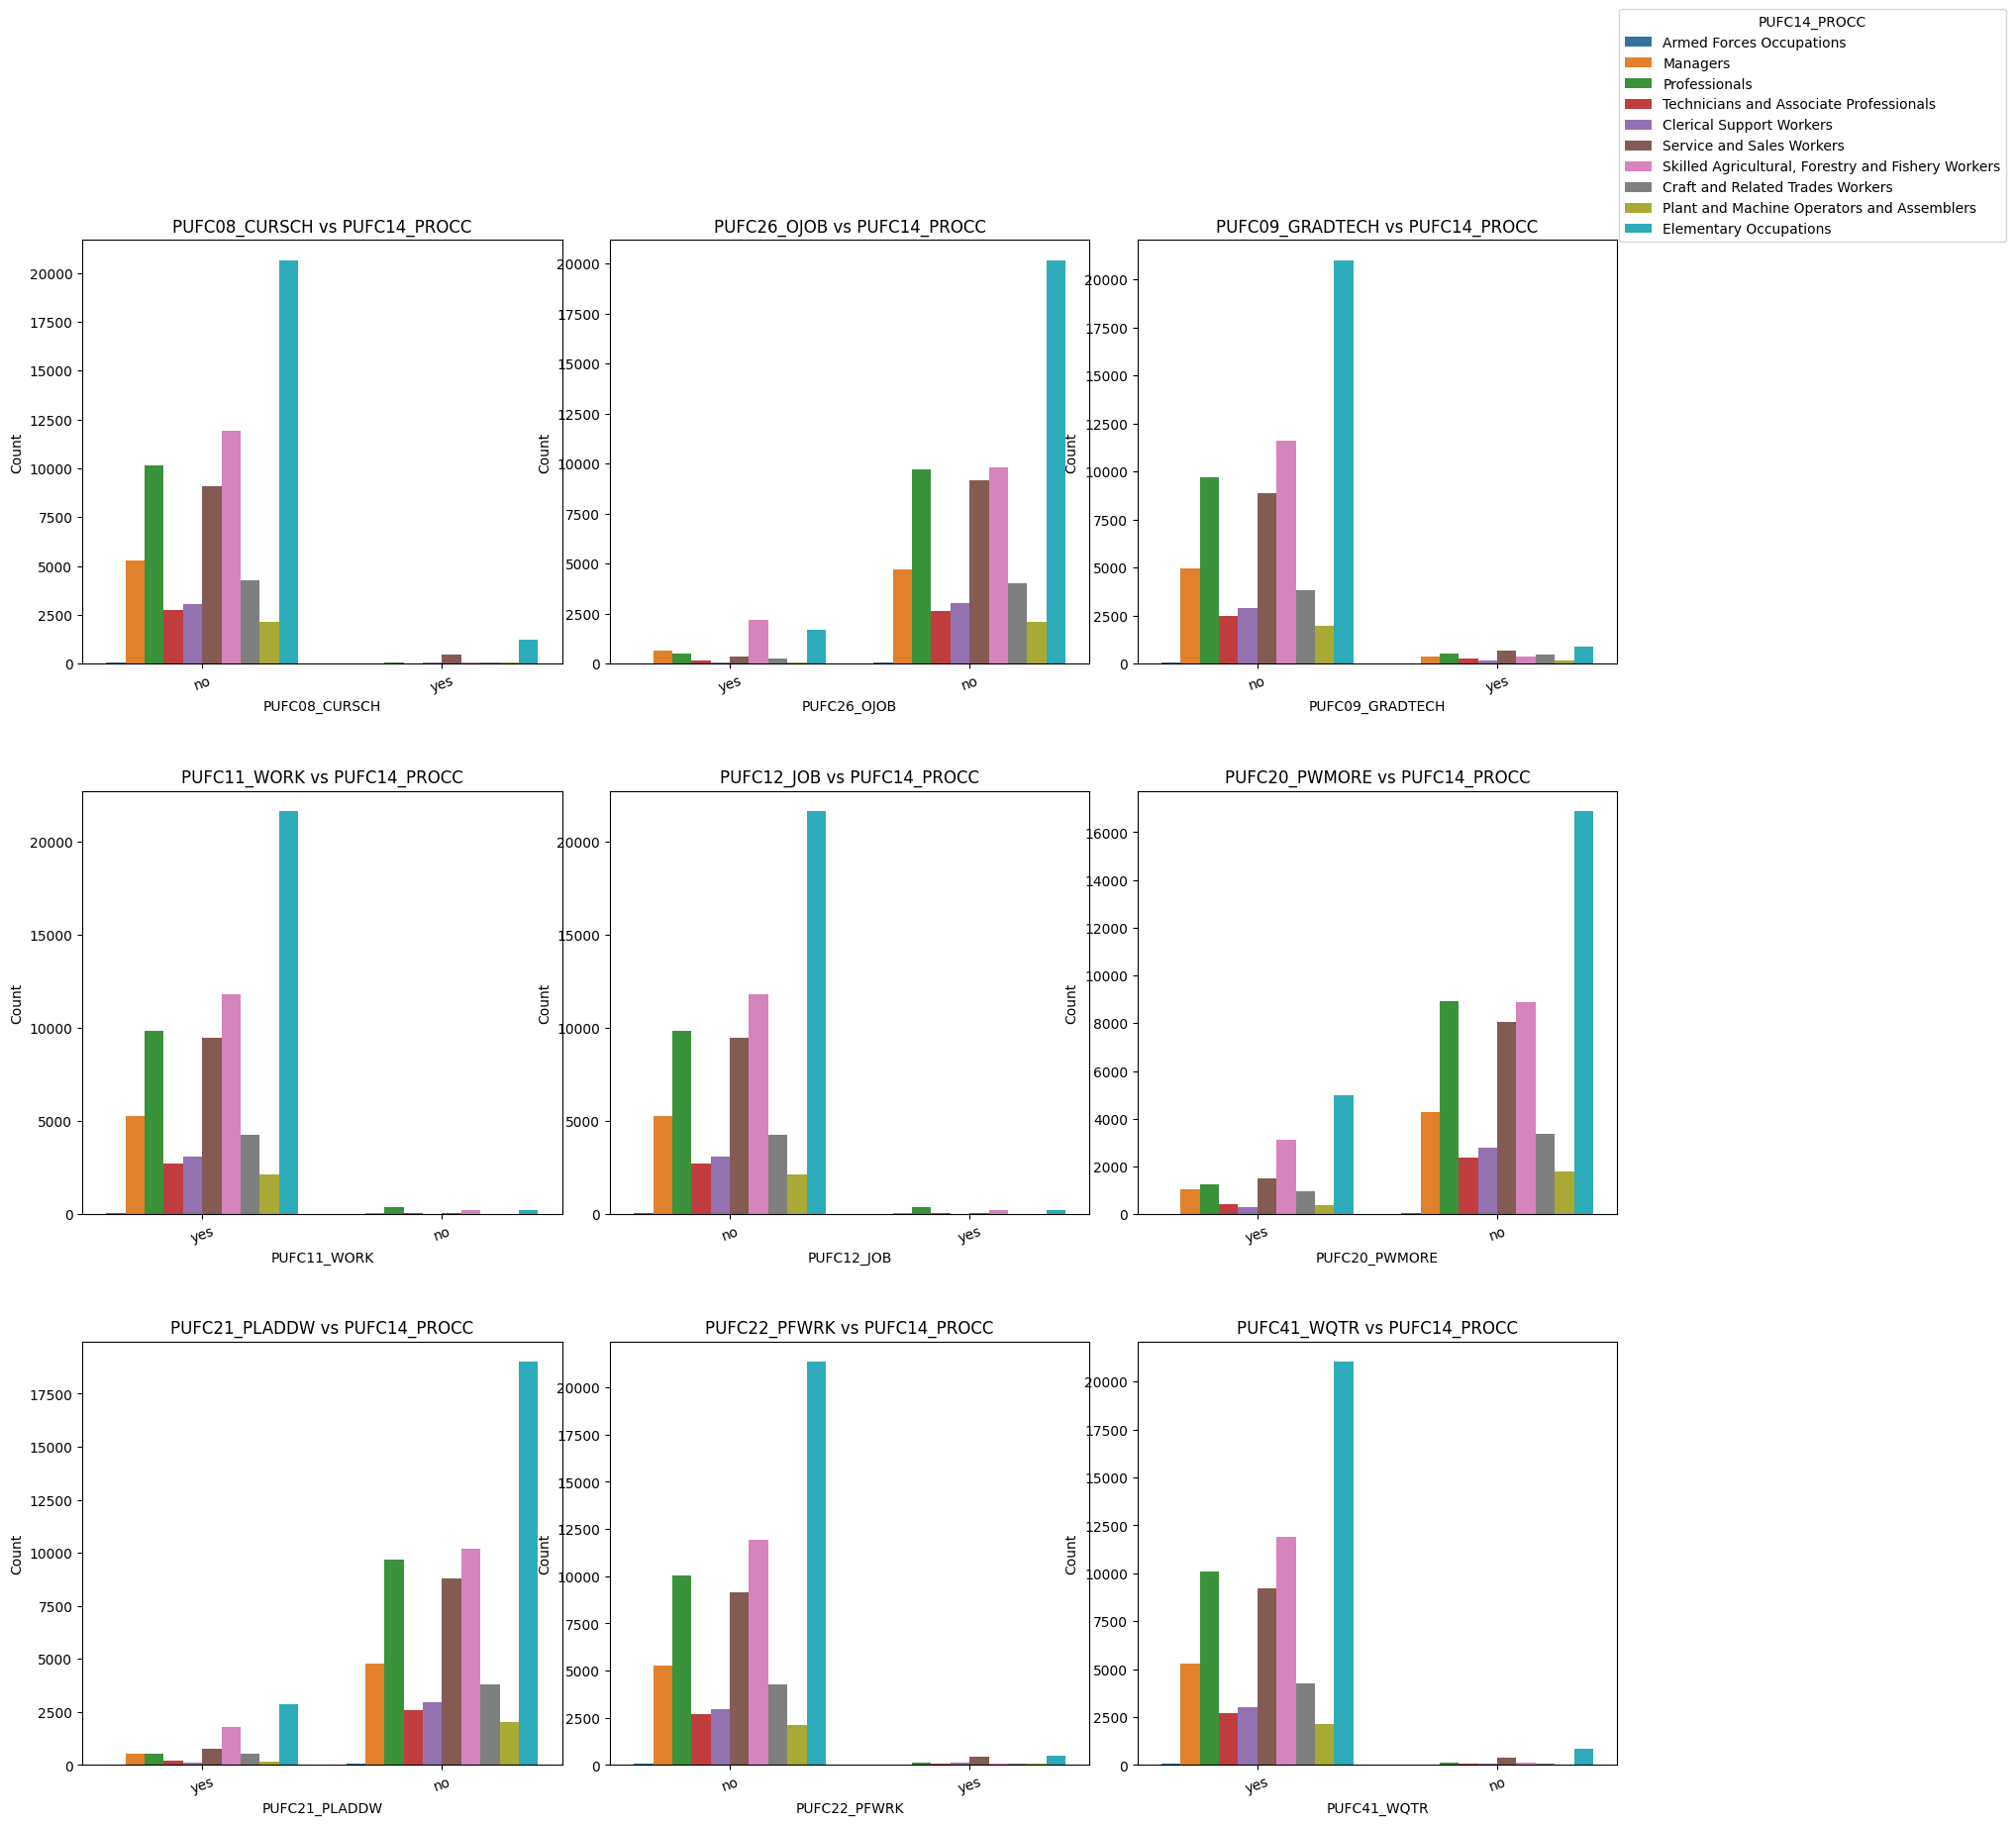

In [444]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))  # 3x3 grid with larger figure size

# Initialize a list to store legend handles and labels
legend_handles = []
legend_labels = []

for i, (var, ax) in enumerate(zip(binary_categorical_vars, axes.flatten())):
    sns.countplot(x=var, hue="PUFC14_PROCC", data=jobs_df, ax=ax)
    ax.set_title(f"{var} vs PUFC14_PROCC")
    ax.set_xlabel(var)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=20)
    
    # Store handles and labels from the first subplot (assuming all are the same)
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()
        legend_handles.extend(handles)
        legend_labels.extend(labels)
    
    # Remove the legend from the current subplot
    ax.get_legend().remove()

# Adjust layout and add a single legend outside the plot
plt.subplots_adjust(hspace=0.3, wspace=0.1)
fig.legend(legend_handles, legend_labels, title="PUFC14_PROCC", loc="upper right", bbox_to_anchor=(1.1, 1))

plt.show()

We can examine Cramer’s V to measure the strength of the relationship. Cramer’s V is a measure of association between two categorical variables. It ranges from 0 (no association) to 1 (perfect association).

In [445]:
def cramers_v(chi2, n, r, c):
    return np.sqrt(chi2 / (n * (min(r, c) - 1)))

cramers_v_values = {}

for var in binary_categorical_vars:
    contingency_table = pd.crosstab(jobs_df[var], jobs_df["PUFC14_PROCC"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    n = contingency_table.sum().sum()  # Total sample size
    r, c = contingency_table.shape  # Rows and columns
    
    v = cramers_v(chi2, n, r, c)  # Compute Cramér's V
    cramers_v_values[var] = v
    
    print(f"Cramer's V for {var} vs PUFC14_PROCC: {v:.3f}")

# Sort by strength of association
sorted_cramers_v = sorted(cramers_v_values.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Cramer's V values:")
for var, v in sorted_cramers_v:
    print(f"{var}: {v:.3f}")

Cramer's V for PUFC08_CURSCH vs PUFC14_PROCC: 0.145
Cramer's V for PUFC26_OJOB vs PUFC14_PROCC: 0.181
Cramer's V for PUFC09_GRADTECH vs PUFC14_PROCC: 0.097
Cramer's V for PUFC11_WORK vs PUFC14_PROCC: 0.079
Cramer's V for PUFC12_JOB vs PUFC14_PROCC: 0.079
Cramer's V for PUFC20_PWMORE vs PUFC14_PROCC: 0.126
Cramer's V for PUFC21_PLADDW vs PUFC14_PROCC: 0.119
Cramer's V for PUFC22_PFWRK vs PUFC14_PROCC: 0.095
Cramer's V for PUFC41_WQTR vs PUFC14_PROCC: 0.089

Sorted Cramer's V values:
PUFC26_OJOB: 0.181
PUFC08_CURSCH: 0.145
PUFC20_PWMORE: 0.126
PUFC21_PLADDW: 0.119
PUFC09_GRADTECH: 0.097
PUFC22_PFWRK: 0.095
PUFC41_WQTR: 0.089
PUFC11_WORK: 0.079
PUFC12_JOB: 0.079


Most relationships are weak, although `PUFC26_OJOB` and `PUFC08_CURSCH` have the strongest associations with `PUFC14_PROCC`. While still "moderate", these may be worth further exploration.

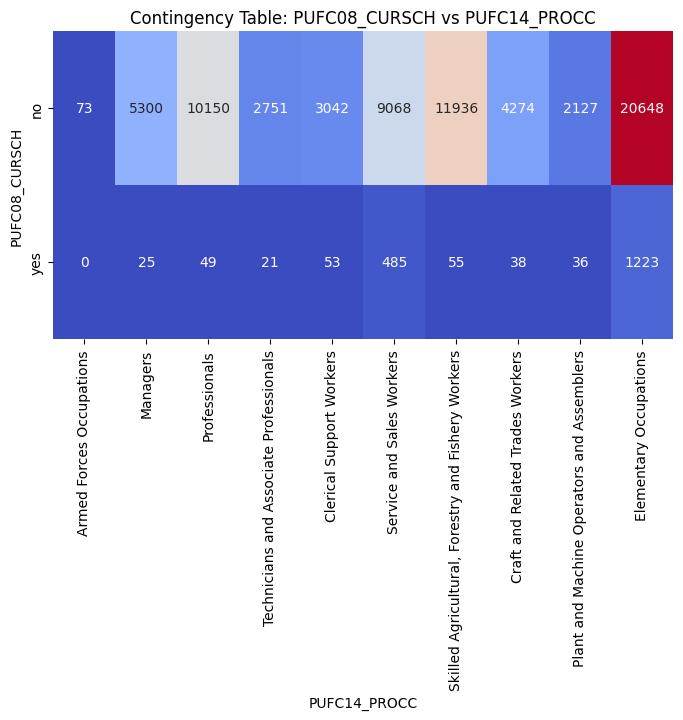

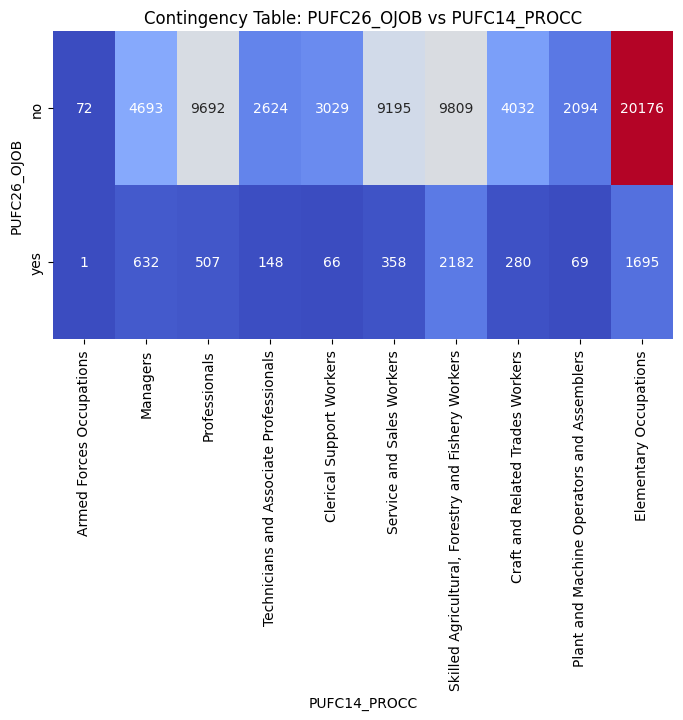

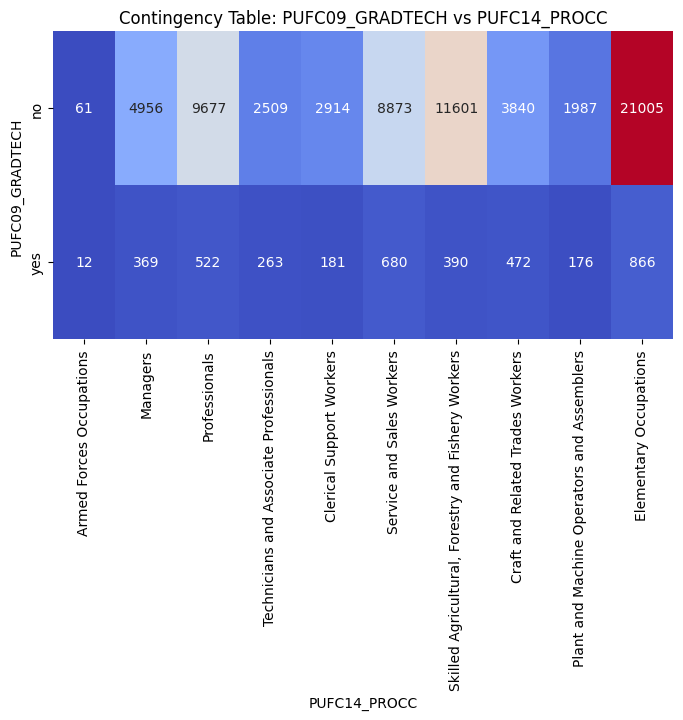

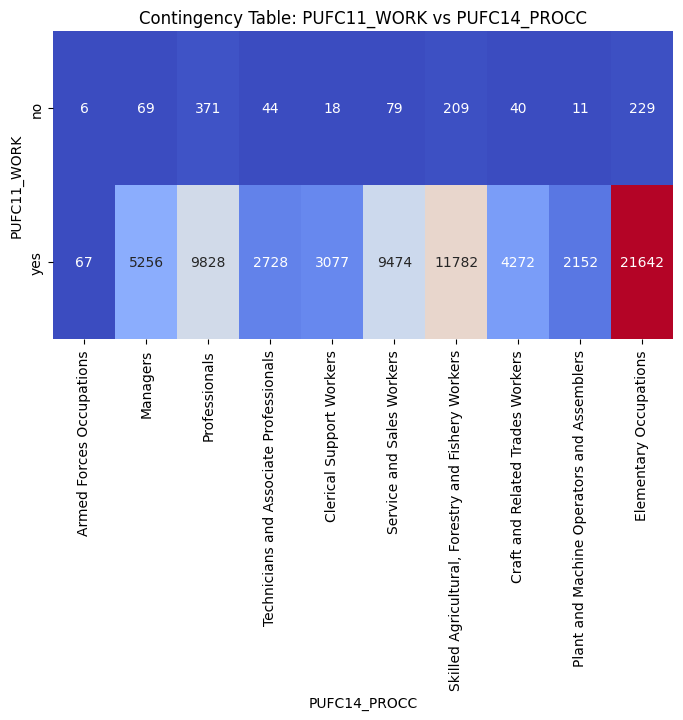

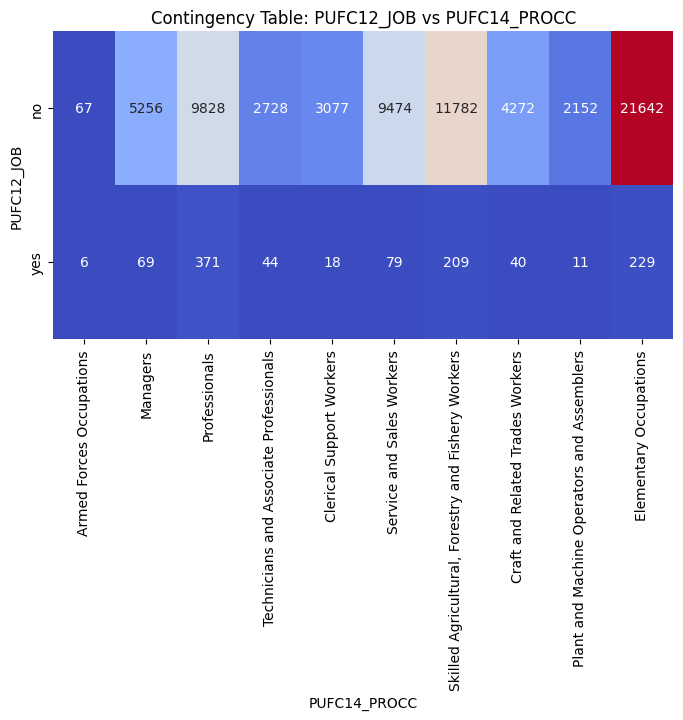

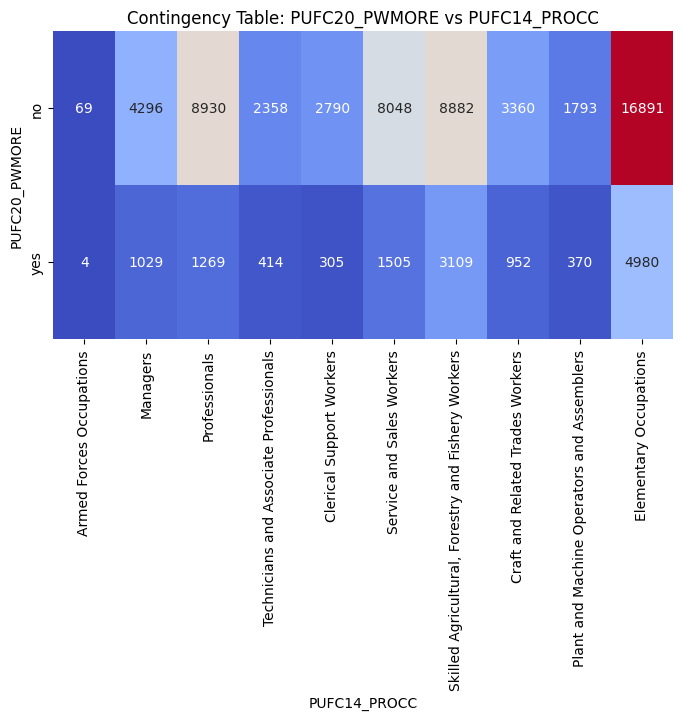

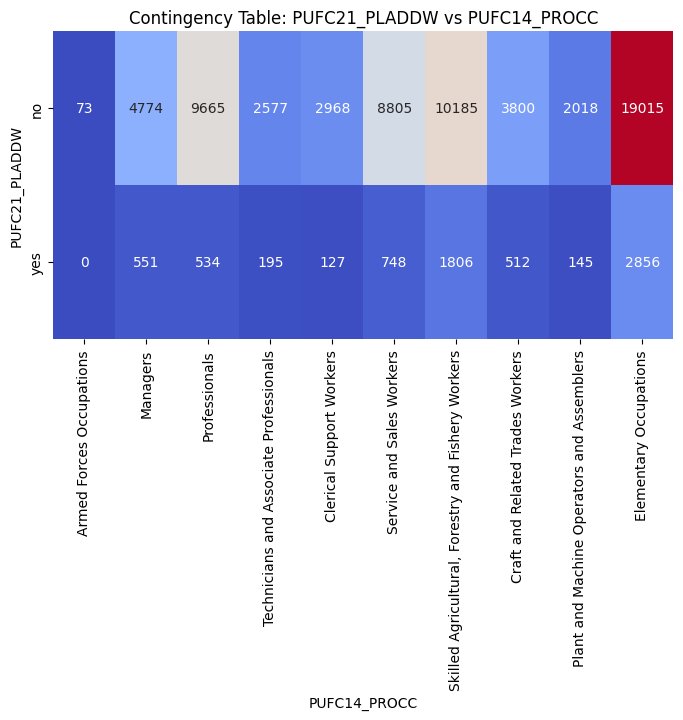

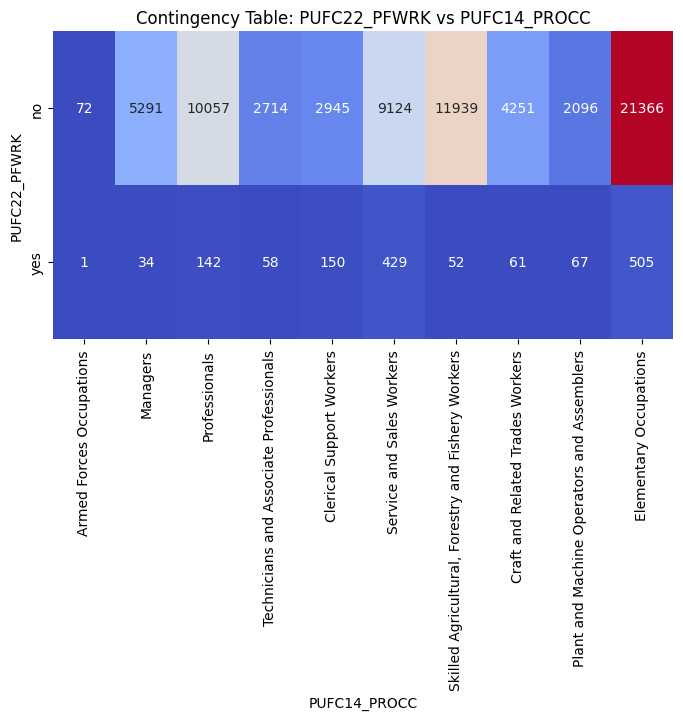

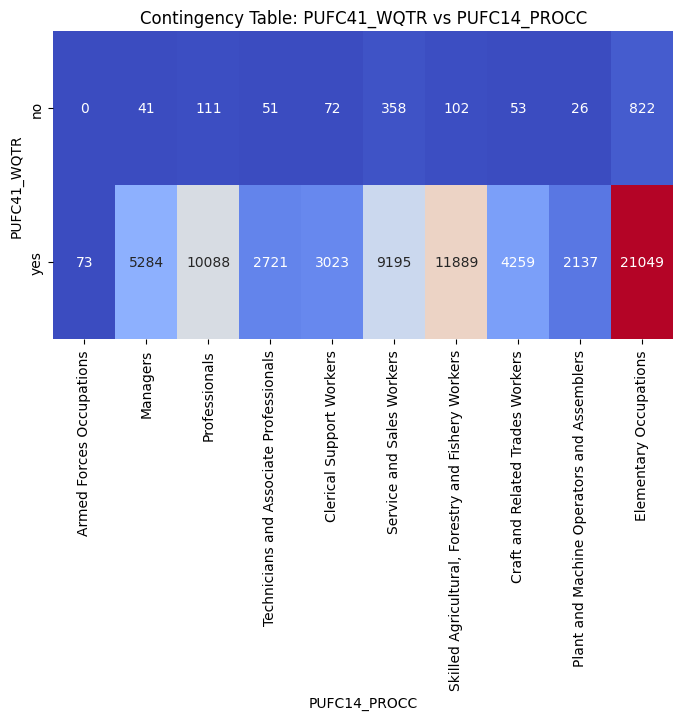

In [446]:
for var in binary_categorical_vars:
    contingency_table = pd.crosstab(jobs_df[var], jobs_df["PUFC14_PROCC"])
    
    plt.figure(figsize=(8, 4))
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", cbar=False)
    plt.title(f"Contingency Table: {var} vs PUFC14_PROCC")
    plt.xlabel("PUFC14_PROCC")
    plt.ylabel(var)
    plt.show()

<span style="background-color:green">TO EXPLAIN</span>

Here, we're going to be looking at the relationship between the **Categorical** variables and the target variable, `PUFC14_PROCC`, which is categorical.

Cramer’s V measures the strength of association between two categorical variables. With 0 (no association) to 1 (strongest association). This helps us identify which categorical variables have the strongest relationships with `PUFC14_PROCC`.

In [447]:
def cramers_v(conf_matrix):
    # Compute Cramer's V from a contingency table.
    chi2, p, _, _ = ss.chi2_contingency(conf_matrix, correction=False)  # No Yates correction
    n = conf_matrix.sum().sum()
    k, r = conf_matrix.shape
    v = np.sqrt(chi2 / (n * (min(k - 1, r - 1))))
    return v, p  # Return both Cramér’s V and p-value

# List of categorical variables
categorical_vars = [
    "PUFC17_NATEM", "PUFC07_GRADE", "PUFC06_MSTAT", "PUFC04_SEX", "PUFC16_PKB", 
    "PUFREG", "PUFC23_PCLASS", "PUFC24_PBASIS", "PUFC43_QKB", "PUFC29_WWM48H", 
    "PUFC03_REL", "PUFURB2K10", "PUFC10_CONWR"
]

# Dictionary to store Cramer's V values and p-values
cramers_v_results = []

# Compute Cramer's V and p-value for each variable
for var in categorical_vars:
    contingency_table = pd.crosstab(jobs_df[var], jobs_df["PUFC14_PROCC"])
    v, p = cramers_v(contingency_table)
    cramers_v_results.append((var, v, p))

# Convert to DataFrame and display
cramers_v_df = pd.DataFrame(cramers_v_results, columns=["Variable", "Cramer's V", "p-value"])

# Sort by highest association
cramers_v_df = cramers_v_df.sort_values(by="Cramer's V", ascending=False)

# Display results
print(cramers_v_df)

         Variable  Cramer's V   p-value
8      PUFC43_QKB    0.506232  0.000000
4      PUFC16_PKB    0.450908  0.000000
3      PUFC04_SEX    0.411364  0.000000
6   PUFC23_PCLASS    0.369475  0.000000
11     PUFURB2K10    0.321418  0.000000
0    PUFC17_NATEM    0.246487  0.000000
1    PUFC07_GRADE    0.228610  0.000000
7   PUFC24_PBASIS    0.220708  0.000000
9   PUFC29_WWM48H    0.154672  0.000000
10     PUFC03_REL    0.144844  0.000000
2    PUFC06_MSTAT    0.120587  0.000000
5          PUFREG    0.113871  0.000000
12   PUFC10_CONWR    0.011705  0.368888


Cramer’s V tells us the strength of association between each categorical variable and the target variable `PUFC14_PROCC`. The closer the value is to 1, the stronger the relationship.
- **Strongest Association (Cramer's V > 0.3)**
  - PUFC43_QKB (0.506) → Strongest relationship with PUFC14_PROCC.
  - PUFC16_PKB (0.451) → Also strongly related.
  - PUFC04_SEX (0.411) → Gender seems to be an important factor.
  - PUFC23_PCLASS (0.369) → Likely contributes significantly.
  - PUFURB2K10 (0.321) → Urban/rural classification has an impact.

  These variables are likely to be key predictors of `PUFC14_PROCC`. We should pay special attention to them.

  `PUFC10_CONWR` is not statistically significant (p > 0.05), so it might not be useful for analysis.

A contingency table shows how two categorical variables relate. Let's go with Heatmaps :)

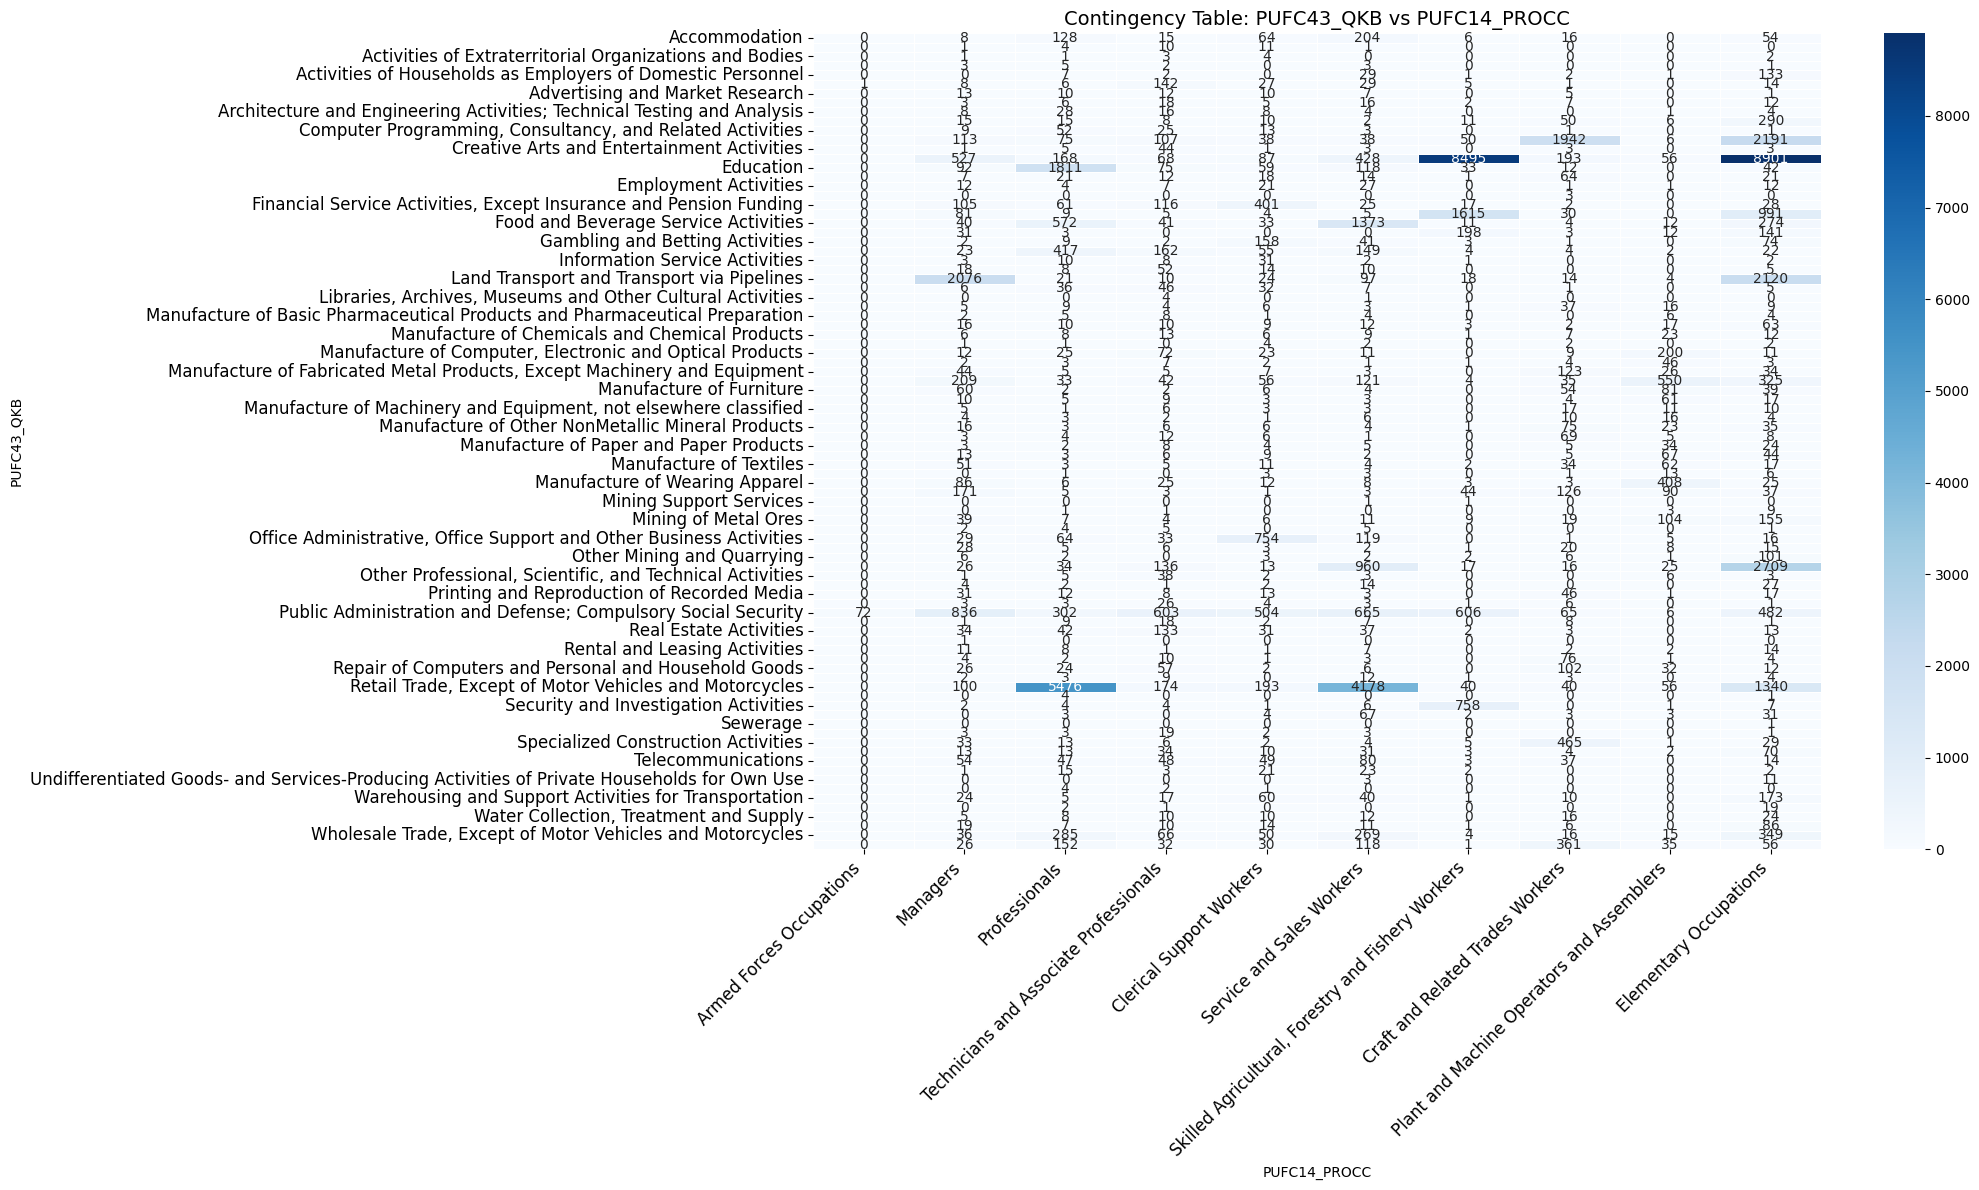

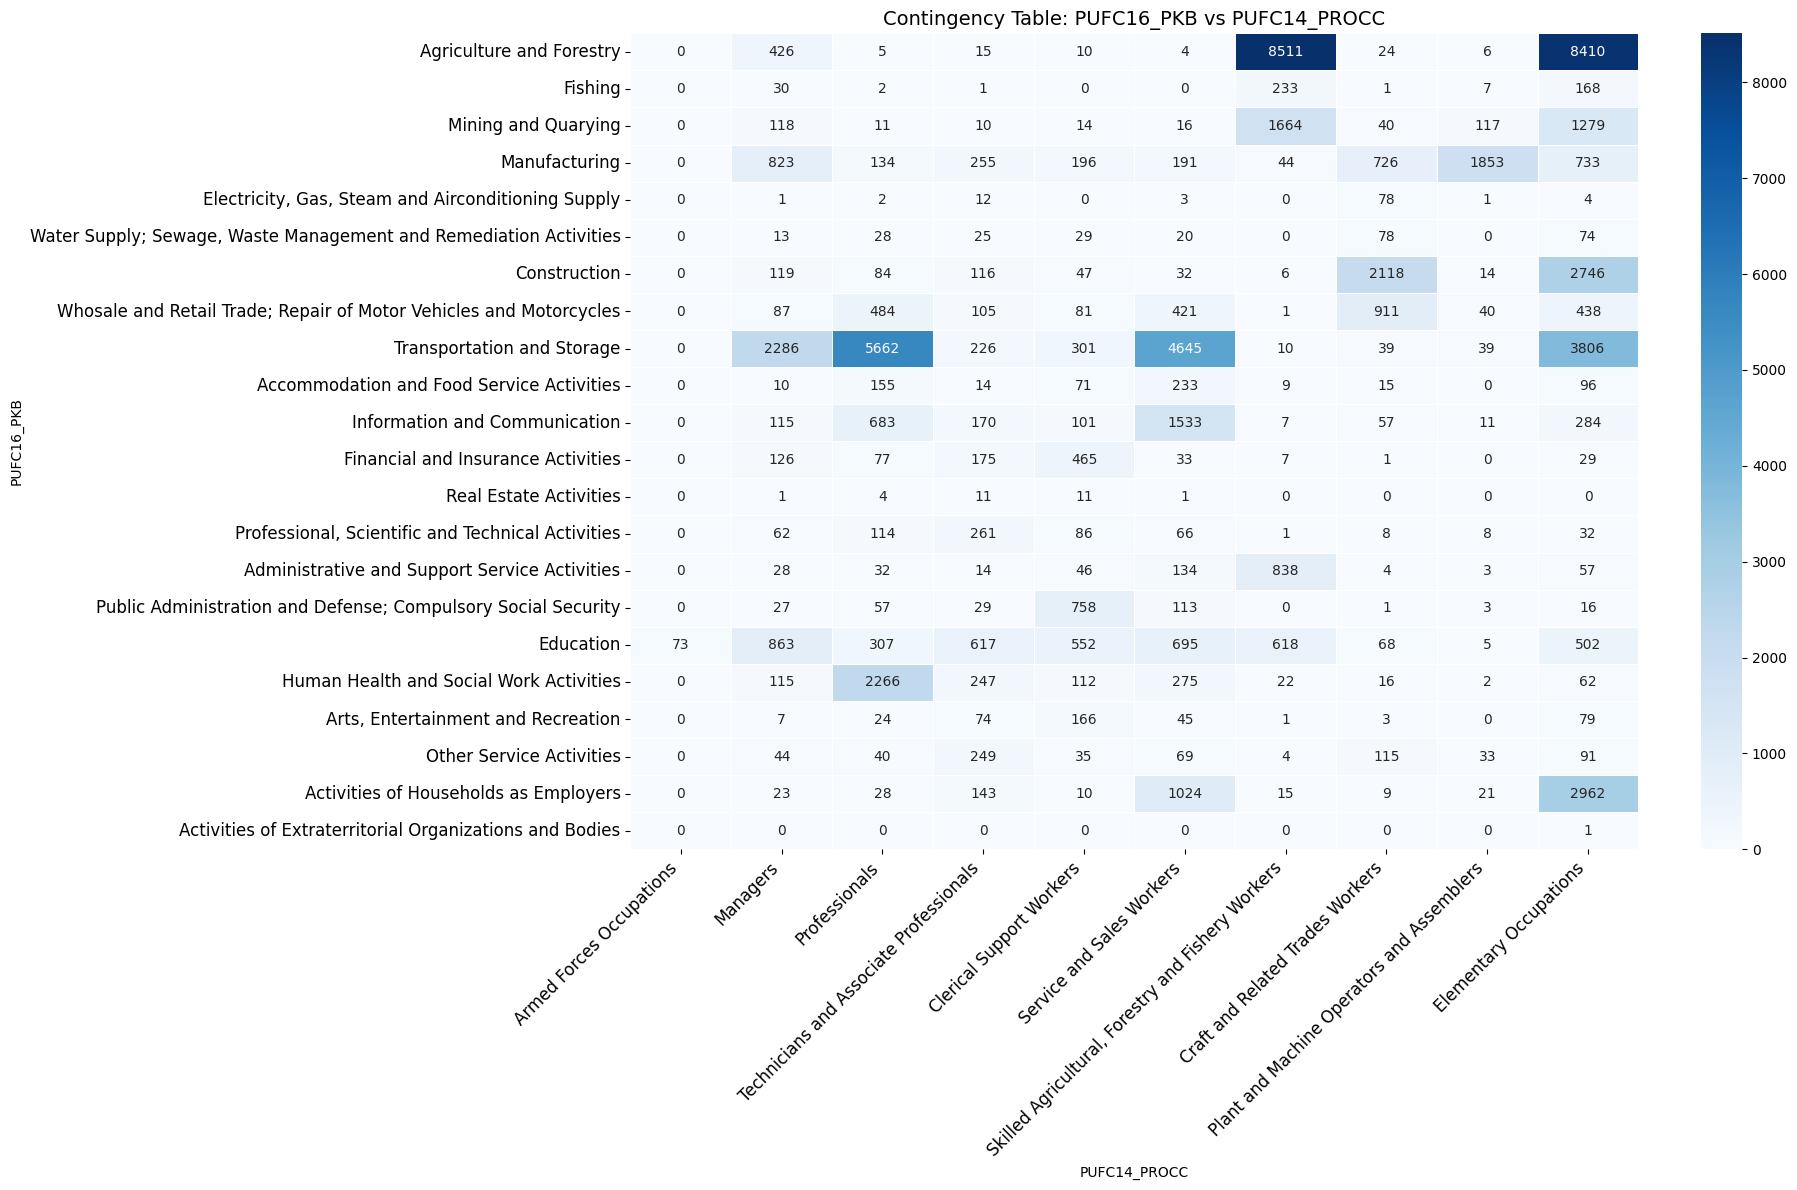

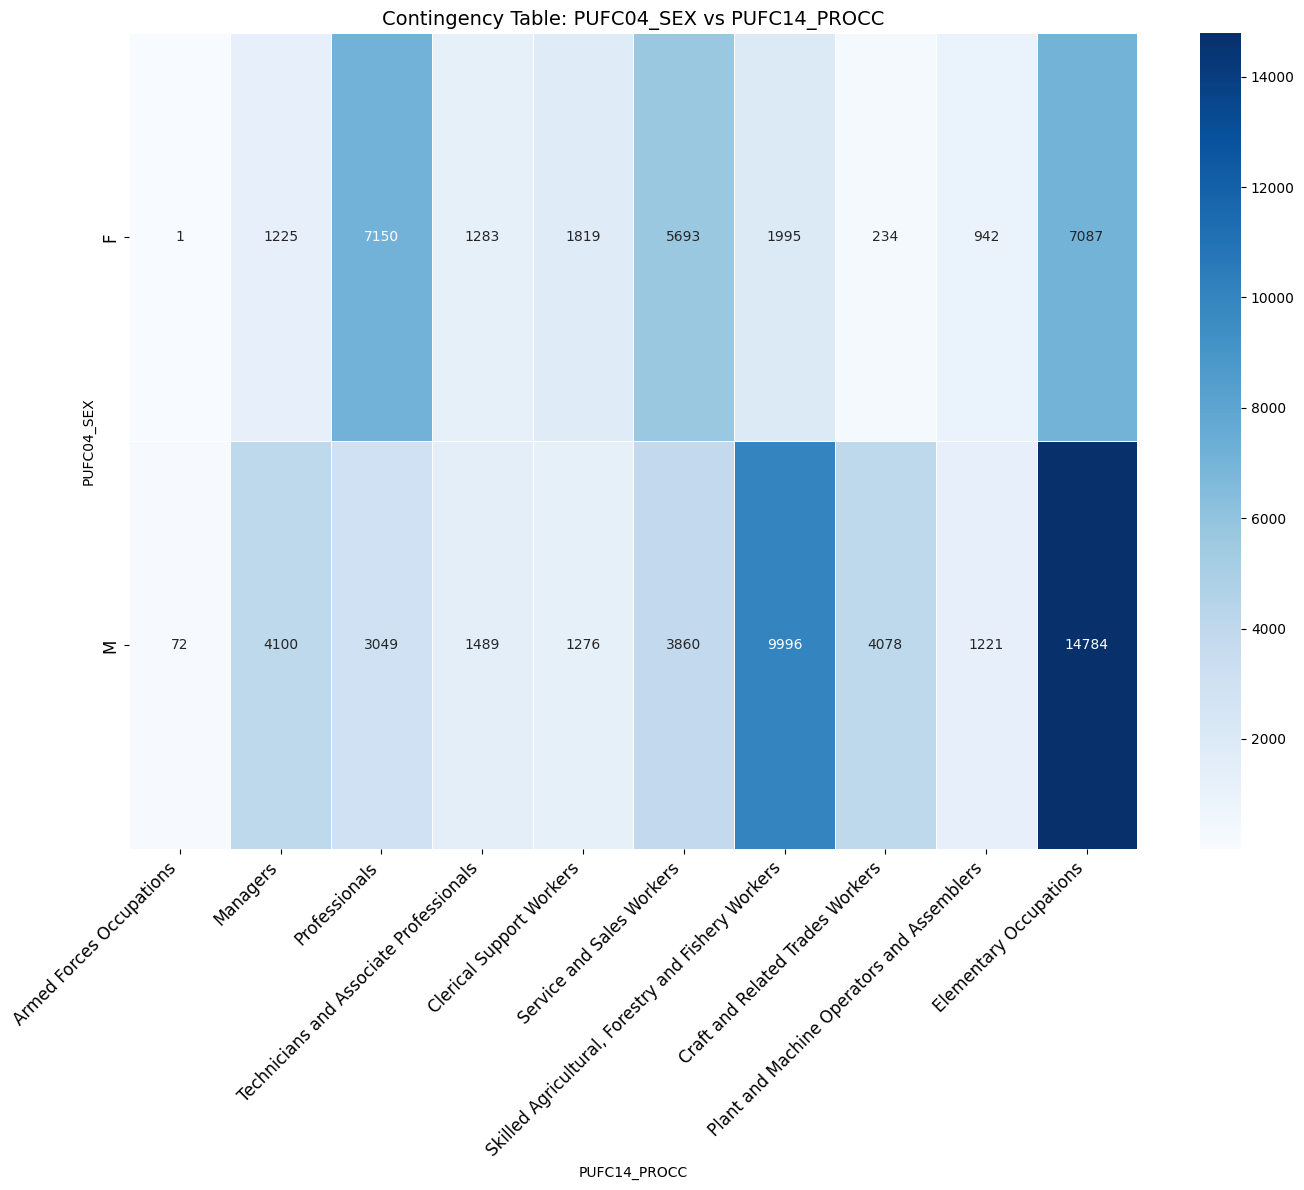

In [448]:
# Generate heatmaps for the top 3 most associated variables
top_3_vars = cramers_v_df["Variable"].head(3)

for var in top_3_vars:
    plt.figure(figsize=(18,12))  # Larger figure size
    contingency_table = pd.crosstab(jobs_df[var], jobs_df["PUFC14_PROCC"])
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", linewidths=0.5)  # Add spacing in cells
    plt.title(f"Contingency Table: {var} vs PUFC14_PROCC", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate for better readability
    plt.yticks(fontsize=12)
    plt.subplots_adjust(bottom=0.2, left=0.2)  # Add more space
    plt.show()


EXPLAIN 2

#### SUMMARY Observations (Binary-Categorical/Categorical EDA)

<span style="background-color:green">TODO</span>

### Numerical/Categorical EDA
Here, we're going to be looking at the relationship between the **numerical** variables and the target variable, `PUFC14_PROCC`, which is categorical.

<span style="background-color:green">TODO</span>

In [449]:
# code

#### SUMMARY Observations (Numerical/Categorical EDA)

### Categorical/Categorical EDA
Here, we're going to be looking at the relationship between the **categorical** variables and the target variable, `PUFC14_PROCC`, which is categorical.

Our list of categorical variables are the following, rearranged in order for easier reference:
* PUFREG: Region where the respondent originates from.
* PUFURB2K10: Urban / Rural in FIES 2010 survey; If the respondent lives in an urban or rural area
* PUFC03_REL: Relationship of the respondent to the household head.
* PUFC04_SEX: Biological Sex of the respondent.
* PUFC06_MSTAT: Marital status of the person.
* PUFC07_GRADE: Highest grade completed.
* PUFC10_CONWR: Overseas Filipino Indicator.
* PUFC14_PROCC: Primary Occupation. <span style="background-color:red"><- Our Target Variable</span>
* PUFC16_PKB: Kind of industry that the respondent works in.
* PUFC17_NATEM: Nature of Employment.
* PUFC23_PCLASS: Class of worker for primary occupation.
* PUFC24_PBASIS: Basis of payment for primary occupation.
* PUFC29_WWM48H: Reasons for working more than 48 hours during the past week (VS1).
* PUFC43_QKB: Kind of business (major industry worked in) for the past quarter.

(13 variables excluding target)

#### Kinds of Categorical EDAs to be conducted in this Section
"Univariate analysis is a type of exploratory data analysis (EDA) that focuses on examining one variable at a time. The goal of univariate analysis is to gain insights into the data and identify patterns or anomalies that may require further investigation." ([Source](https://ankushmulkar.medium.com/complete-exploratory-data-analysis-step-by-step-guide-for-data-analyst-34a07156217a))
* Get the frequency counts for each categorical variable/predictor and display the result in tables
* Visualize the frequency distribution using bar charts/plots to get a visual overview

Bivariate Analysis (Categorical Variables in comparison with the Target Variable)
* Cross-Tabulation/Contingency Table using `pd.crosstab()` and display the tables
* Normalized Cross-Tabulations by calculating row percentages, column percentages, or total percentages 
* Visualize cross-tabulation using stacked or grouped bar charts to show the distribution of the target variable, per category of the predictor vars
* Chi-Square Test (get chi-square statistic and p-value) for independence
* Visualization of Statistical Tests (bar graph for Chi-Square test)

Observations and Conclusions will be at the end of this section, before Section 6.

#### A1 Univariate Analysis: Frequency Counts
The code below gets the basic count distributions of the categorical variables This is to help us understand the underlyuing structure of our categorical data before performing more advanced statistical analyses to determine the relationship between these variables.


NOTE: The datatypes are in `float64` type because we used log transformation to normalize all the variables to have proportion. For all of the `dtype=category` variables in the datacleaning, we turned all of them into `string`.

In [450]:
# filter/select all the columns that are categorical, would have 'string' dtype
categ_columns = jobs_df.select_dtypes(include=['string']).columns.tolist()

for col in categ_columns:
    print(f"\n----- Distribution of {col} -----")
    print(jobs_df[col].value_counts(normalize=True) * 100) # gives proportion of each value, *100 for percentage
    print(f"Number of unique values: {jobs_df[col].nunique()}")


----- Distribution of PUFREG -----
PUFREG
National Capital Region                 14.59764
Region III - Central Luzon              7.639376
Region VI - Western Visayas             6.748045
Region VIII - Eastern Visayas           6.721417
Region VII - Central Visayas            6.323402
Region X - Northern Mindanao            6.288365
Cordillera Administrative Region        6.200073
Region V - Bicol                        5.504947
Region XIII - Caraga                    5.160187
Region XI - Davao                       5.150377
Region IVB - MIMAROPA                   4.961179
Region XII - SOCCSKSARGEN                4.87569
Region IVA - CALABARZON                 4.753763
Region IX - Zamboanga Peninsula         3.849819
Autonomous Region in Muslim Mindanao    3.828797
Region I - Ilocos Region                3.736301
Region II - Cagayan Valley              3.660622
Name: proportion, dtype: Float64
Number of unique values: 17

----- Distribution of PUFURB2K10 -----
PUFURB2K10
Rural    56.

<span style="background-color:red">MISSING: PUFC16_PKB, PUFC17_NATEM</span>

#### A2 Univariate Analysis: Bar Plots
<span style="background-color:green">TODO</span>

In [451]:
categ_cols_no_target = [col for col in cat_columns if col != 'PUFC14_PROCC']

NameError: name 'cat_columns' is not defined

#### SUMMARY Observations (Categorical/Categorical EDA)

---
# **Section 6: Initial Model Training**

### Models to create (delete later)
- kNN (Jack)
- Neural Nets (Yazan)
- Naive bayes (Marcus)